# Importing  Libraries

In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

# Importing Datafiles

In [3]:
# Reading the csv file 'loan.csv' using 'read_csv'
Loan = pd.read_csv(r'C:\Users\Jyoti Mishra\Downloads\loan\loan.csv')
# visualisation of data set
Loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [4]:
# Checking no. of rows and columns of dataframe
Loan.shape

(39717, 111)

# Dataset Overview

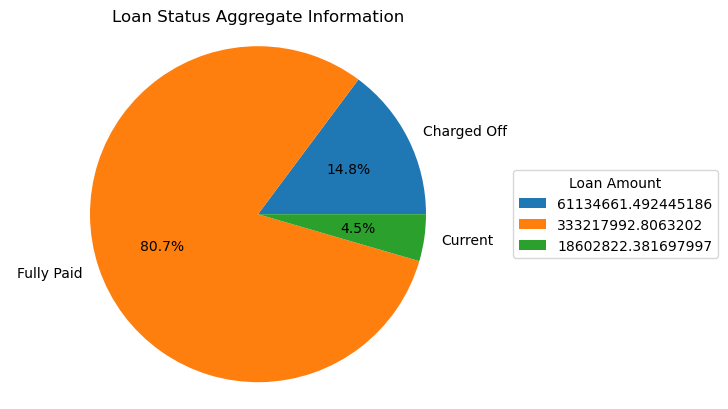

In [5]:
# plotting pie chart for different types of loan_status
chargedOffLoans = Loan.loc[(Loan["loan_status"] == "Charged Off")]
currentLoans = Loan.loc[(Loan["loan_status"] == "Current")]
fullyPaidLoans = Loan.loc[(Loan["loan_status"]== "Fully Paid")]
data  = [{"Charged Off": chargedOffLoans["funded_amnt_inv"].sum(),"Fully Paid":fullyPaidLoans["funded_amnt_inv"].sum(),"Current":currentLoans["funded_amnt_inv"].sum()}]
investment_sum = pd.DataFrame(data) 
chargedOffTotalSum = float(investment_sum["Charged Off"])
fullyPaidTotalSum = float(investment_sum["Fully Paid"])
currentTotalSum = float(investment_sum["Current"])
loan_status = [chargedOffTotalSum,fullyPaidTotalSum,currentTotalSum]
loan_status_labels = 'Charged Off','Fully Paid','Current'
plt.pie(loan_status,labels=loan_status_labels,autopct='%1.1f%%')
plt.title('Loan Status Aggregate Information')
plt.axis('equal')
plt.legend(loan_status,title="Loan Amount",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

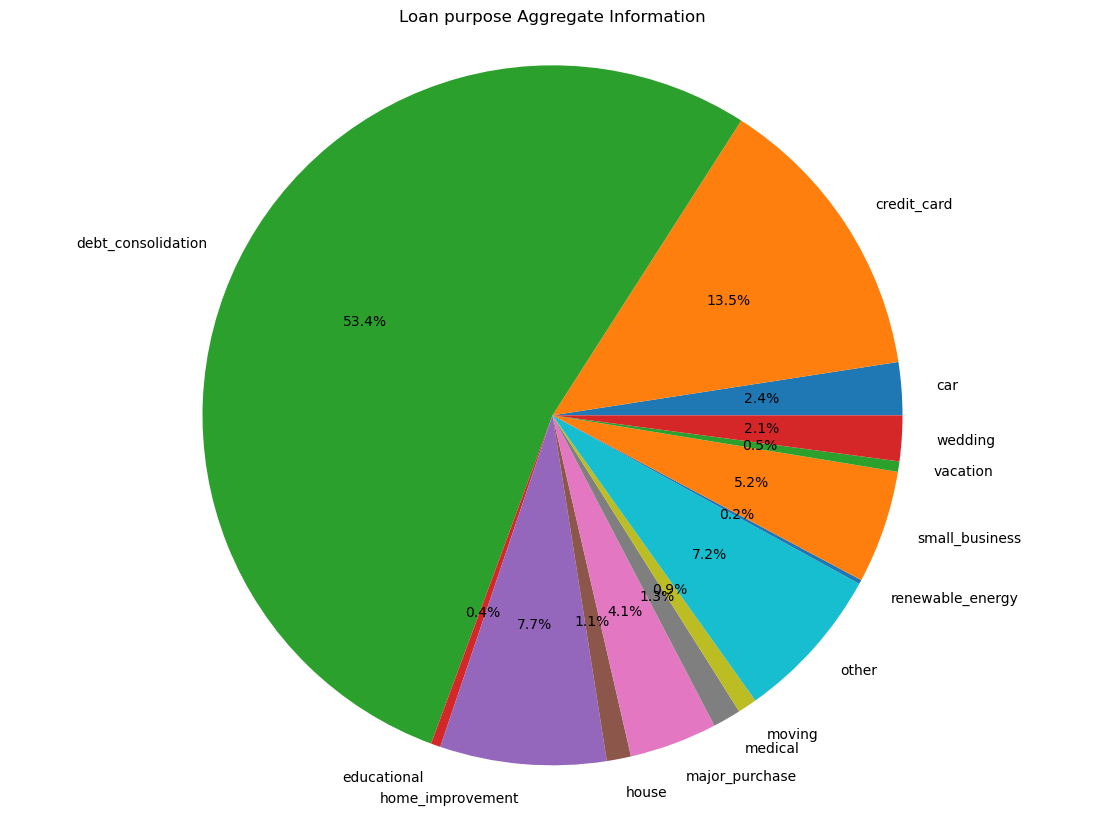

In [9]:
# plotting pie chart for different types of purpose
loans_purpose = Loan.groupby(['purpose'])['funded_amnt_inv'].sum().reset_index()
plt.figure(figsize=(14, 10))
plt.pie(loans_purpose["funded_amnt_inv"],labels=loans_purpose["purpose"],autopct='%1.1f%%')
plt.title('Loan purpose Aggregate Information')
plt.axis('equal')
plt.show()

In [78]:
# Check the column-wise info of the dataframe
Loan.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [79]:
Loan.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

# DATA CLEANING 

In [80]:
# checking the rows which has all null values
all_null_rows = Loan[Loan.isnull().all(axis=1)]
print(all_null_rows)

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, tot

In [81]:
# checking is there any duplicate data in the data set
if(len(Loan) == len(Loan.member_id.unique())):
    print("No duplicate data found!")
else:
    print("Some duplicates occur.")

No duplicate data found!


In [82]:
# Checking columns which has null value
Loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [83]:
# Checking % of missing values column wise

Loan.isnull().sum()/len(Loan)*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [84]:
# droping the columns which has 100% null values
Loan.dropna(axis=1, how='all', inplace=True)
Loan.shape


(39717, 57)

In [85]:
# Checking % of missing values
Loan.isnull().sum()/len(Loan)*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [86]:
# dropping the columns which has more than 60% null values
#also dropping desc as it is a Loan description provided by the borrower which has 36% missing values
# but we also have title column which is The loan title provided by the borrower so instead of desc we can use title
Loan.drop(columns=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc'], inplace=True)
Loan.shape

(39717, 53)

In [87]:
# since we have member id which is an unique number given to all borrowed member so we can drop id
# dropping url as it is a link and is of no use in analysis
# dropping 'application_type','policy_code','collections_12_mths_ex_med','initial_list_status','pymnt_plan'because all this column contain same data for every member
# And since similar data for every member will of no use for analysis so dropping it 
Loan.drop(columns=['id','url','application_type','policy_code','collections_12_mths_ex_med','initial_list_status','pymnt_plan'],inplace=True)
Loan.shape

(39717, 46)

## Removing all irrelevant columns

In [88]:
# member_id - not required
# funded_amnt - not useful, funded_amnt_inv is useful which is funded to person
# emp_title - brand names not useful
# title - too many distinct values not useful
# zip_code - complete zip is not available
# delinq_2yrs - post approval feature
# revol_bal - post/behavioural feature
# out_prncp - post approval feature
# out_prncp_inv - not useful as its for investors
# total_pymnt - post approval feature
# total_pymnt_inv - not useful as it is for investors
# total_rec_prncp - post approval feature
# total_rec_int - post approval feature
# total_rec_late_fee - post approval feature
# recoveries - post approval feature
# collection_recovery_fee - post approval feature
# last_pymnt_d - post approval feature
# last_credit_pull_d - irrelevant for approval
# last_pymnt_amnt - post feature
# acc_now_delinq - single valued
# chargeoff_within_12_mths - post feature
# delinq_amnt - single valued
# pub_rec_bankruptcies - single valued for more than 99%
# addr_state - may not depend on location as its in financial domain

colsToDrop =["member_id",'pub_rec_bankruptcies', "funded_amnt",'addr_state', "emp_title","title", "zip_code", "delinq_2yrs","revol_bal","out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "last_credit_pull_d", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", "tax_liens"]
Loan.drop(colsToDrop, axis= 1, inplace=True)
print("Features we are left witpub_rec_bankruptciesh",list(Loan.columns))
# loan.info(max_cols=100)

Features we are left witpub_rec_bankruptciesh ['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc']


## Remove/Impute Missing Values

In [89]:
# find columns with any null values
Loan.columns[Loan.isna().any()]

Index(['emp_length', 'revol_util'], dtype='object')

In [90]:
# find most common value in emp_length to impute
print(Loan["emp_length"].mode())

0    10+ years
Name: emp_length, dtype: object


In [91]:
# in 12 unique values we have 10+ years the most for emp_length, 
# but it is highly dependent variable so we will not impute the values 
# but remove the rows with null values which is around 2.5%
Loan.dropna(axis=0, subset=["emp_length"], inplace=True)
print(Loan.columns[Loan.isna().any()])

Index(['revol_util'], dtype='object')


In [92]:
# remove NA rows for revol_util as its dependent variable and is around 0.1%
Loan.dropna(axis=0, subset=["revol_util"], inplace=True)
print(Loan.columns[Loan.isna().any()])

Index([], dtype='object')


### NOTE:- Now we don't have any null data present in any feature in our dataset.

## Standardize the Data

In [93]:
# update int_rate and revol_util without % sign and save them as numeric type
Loan["int_rate"] = pd.to_numeric(Loan["int_rate"].apply(lambda x:x.split('%')[0]))
Loan["revol_util"] = pd.to_numeric(Loan["revol_util"].apply(lambda x:x.split('%')[0]))
# remove text data from term feature and store as numerical
Loan["term"] = pd.to_numeric(Loan["term"].apply(lambda x:x.split()[0]))
Loan[["int_rate", "revol_util", "term"]].head()

int_rate  revol_util  term
0     10.65        83.7    36
1     15.27         9.4    60
2     15.96        98.5    36
3     13.49        21.0    36
4     12.69        53.9    60

In [94]:
# remove the rows with loan_status as "Current"
Loan = Loan[Loan["loan_status"].apply(lambda x:False if x == "Current" else True)]
print(Loan["loan_status"].unique())
# update loan_status as Fully Paid to 0 and Charged Off to 1
Loan["loan_status"] = Loan["loan_status"].apply(lambda x: 0 if x == "Fully Paid" else 1)
print(Loan["loan_status"].value_counts())

['Fully Paid' 'Charged Off']
loan_status
0    32113
1     5384
Name: count, dtype: int64


In [95]:
# update emp_length feature with continuous values as int
# where (< 1 year) is assumed as 0 and 10+ years is assumed as 10 and rest are stored as their magnitude
Loan["emp_length"] = pd.to_numeric(Loan["emp_length"].apply(lambda x:0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))
Loan["emp_length"].value_counts()

emp_length
10    8487
0     4496
2     4286
3     4008
4     3335
5     3190
1     3163
6     2165
7     1708
8     1433
9     1226
Name: count, dtype: int64

In [96]:
# look through the purpose value counts
loan_purpose_values = Loan["purpose"].value_counts()*100/Loan.shape[0]
print(loan_purpose_values)
# remove rows with less than 1% of value counts in paricular purpose 
loan_purpose_delete = loan_purpose_values[loan_purpose_values<1].index.values
print("Removing rows with purpose as",loan_purpose_delete)

purpose
debt_consolidation    47.107769
credit_card           13.059711
other                  9.867456
home_improvement       7.419260
major_purchase         5.531109
small_business         4.557698
car                    3.856309
wedding                2.432195
medical                1.744140
moving                 1.466784
house                  0.944076
vacation               0.925407
educational            0.837400
renewable_energy       0.250687
Name: count, dtype: float64
Removing rows with purpose as ['house' 'vacation' 'educational' 'renewable_energy']


In [97]:
Loan = Loan[[False if p in loan_purpose_delete else True for p in Loan["purpose"]]]
print("Available purpose types:")
print(Loan["purpose"].value_counts()*100/Loan.shape[0])

Available purpose types:
purpose
debt_consolidation    48.543476
credit_card           13.457733
other                 10.168187
home_improvement       7.645378
major_purchase         5.699681
small_business         4.696603
car                    3.973838
wedding                2.506321
medical                1.797296
moving                 1.511487
Name: count, dtype: float64


## Outlier Treatment

### Looking upon the quantile values of each features, we will treat outliers for the some features

In [98]:
# for annual_inc, the highest value is 6000000 where 75% quantile value is 83000, and is 100 times the mean
Loan["annual_inc"].quantile(0.99)

234996.52

In [99]:
# we need to remomve outliers from annual_inc i.e. 99 to 100%
annual_inc_q = Loan["annual_inc"].quantile(0.99)
Loan = Loan[Loan["annual_inc"] < annual_inc_q]
Loan["annual_inc"].describe()

count     36024.000000
mean      66061.200063
std       35108.578585
min        4080.000000
25%       41000.000000
50%       59498.000000
75%       81996.990000
max      234996.000000
Name: annual_inc, dtype: float64

In [100]:
# for open_acc, the highest value is 44 where 75% quantile value is 12, and is 5 times the mean
Loan["open_acc"].quantile(0.999)

30.0

In [101]:
# we need to remomve outliers from open_acc i.e. 99.9 to 100%
open_acc_q = Loan["open_acc"].quantile(0.999)
Loan = Loan[Loan["open_acc"] < open_acc_q]
Loan["open_acc"].describe()

count    35983.000000
mean         9.278576
std          4.305220
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         29.000000
Name: open_acc, dtype: float64

In [102]:
# for total_acc, the highest value is 90 where 75% quantile value is 29, and is 4 times the mean
Loan["total_acc"].quantile(0.98)

50.0

In [103]:
# we need to remomve outliers from total_acc i.e. 98 to 100%
total_acc_q = Loan["total_acc"].quantile(0.98)
Loan = Loan[Loan["total_acc"] < total_acc_q]
Loan["total_acc"].describe()

count    35205.000000
mean        21.283482
std         10.206243
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         49.000000
Name: total_acc, dtype: float64

In [104]:
# for pub_rec, the highest value is 4 where 75% quantile value is 0, and is 4 times the mean
Loan["pub_rec"].quantile(0.995)

1.0

In [105]:
# we need to remomve outliers from pub_rec i.e. 99.5 to 100%
pub_rec_q = Loan["pub_rec"].quantile(0.995)
Loan = Loan[Loan["pub_rec"] <= pub_rec_q]
Loan["pub_rec"].describe()

count    35152.000000
mean         0.051320
std          0.220653
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: pub_rec, dtype: float64

In [106]:
# all values seems fine now, later will be checked while plotting boxplots
Loan.describe()

loan_amnt  funded_amnt_inv          term      int_rate  \
count  35152.000000     35152.000000  35152.000000  35152.000000   
mean   11064.723913     10241.940372     41.928994     11.939896   
std     7243.360102      6929.914534     10.351132      3.664741   
min      500.000000         0.000000     36.000000      5.420000   
25%     5500.000000      5000.000000     36.000000      8.940000   
50%     9975.000000      8875.000000     36.000000     11.830000   
75%    15000.000000     14000.000000     36.000000     14.350000   
max    35000.000000     35000.000000     60.000000     24.110000   

        installment    emp_length     annual_inc   loan_status           dti  \
count  35152.000000  35152.000000   35152.000000  35152.000000  35152.000000   
mean     322.920647      4.907658   65450.475366      0.144003     13.348729   
std      205.290439      3.547546   34734.256975      0.351098      6.631072   
min       15.690000      0.000000    4080.000000      0.000000      0.000000   
25%      168.090000      2.000000   40800.000000      0.000000      8.250000   
50%      279.920000      4.000000   58000.000000      0.000000     13.450000   
75%      425.195000      9.000000   80004.000000      0.000000     18.580000   
max     1305.190000     10.000000  234996.000000      1.000000     29.990000   

       inq_last_6mths      open_acc       pub_rec    revol_util     total_acc  
count    35152.000000  35152.000000  35152.000000  35152.000000  35152.000000  
mean         0.853892      9.111203      0.051320     49.289566     21.290453  
std          1.054968      4.131175      0.220653     28.255518     10.207551  
min          0.000000      2.000000      0.000000      0.000000      2.000000  
25%          0.000000      6.000000      0.000000     26.100000     13.000000  
50%          1.000000      8.500000      0.000000     49.800000     20.000000  
75%          1.000000     12.000000      0.000000     72.800000     28.000000  
max          8.000000     29.000000      1.000000     99.900000     49.000000

## New Metrics Derivation
-  **Issue date is not in the standard format also we can split the date into two columns with month and the year which will make it easy for analysis**

-  **year in the datetime requires year between 00 to 99 and in some cases year is single digit number i.e. 9 writing a function which will convert such dates to avoid exception in date conversion.**

In [107]:
def standerdisedate(date):
    year = date.split("-")[0]
    if(len(year) == 1):
        date = "0"+date
    return date
# this pattern works on mac but did not work on the windows 
# loan['issue_d'] = loan['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
# use this command on windows 
# loan['issue_d'] = loan['issue_d'].apply(lambda x: datetime.strptime(x, '%y-%b'))
from datetime import datetime
Loan['issue_d'] = Loan['issue_d'].apply(lambda x:standerdisedate(x))
Loan['issue_d'] = Loan['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
# extracting month and year from issue_date
Loan['month'] = Loan['issue_d'].apply(lambda x: x.month)
Loan['year'] = Loan['issue_d'].apply(lambda x: x.year)

In [108]:
# get year from issue_d and replace the same
Loan["earliest_cr_line"] = pd.to_numeric(Loan["earliest_cr_line"].apply(lambda x:x.split('-')[1]))
Loan[["issue_d", "earliest_cr_line"]].head()

issue_d  earliest_cr_line
0 2011-12-01                85
1 2011-12-01                99
2 2011-12-01                 1
3 2011-12-01                96
5 2011-12-01                 4

### Creating Bins for better Analysis

In [109]:


# create bins for loan_amnt range
bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
bucket_l = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
Loan['loan_amnt_range'] = pd.cut(Loan['loan_amnt'], bins, labels=bucket_l)

In [110]:
# create bins for int_rate range
bins = [0, 7.5, 10, 12.5, 15, 100]
bucket_l = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']
Loan['int_rate_range'] = pd.cut(Loan['int_rate'], bins, labels=bucket_l)

In [111]:
# create bins for annual_inc range
bins = [0, 25000, 50000, 75000, 100000, 1000000]
bucket_l = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
Loan['annual_inc_range'] = pd.cut(Loan['annual_inc'], bins, labels=bucket_l)

In [112]:
# create bins for installment range
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=500:
        return 'medium'
    elif n > 500 and n <=800:
        return 'high'
    else:
        return 'very high'

Loan['installment'] = Loan['installment'].apply(lambda x: installment(x))

In [113]:
# create bins for dti range
bins = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
bucket_l = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
Loan['dti_range'] = pd.cut(Loan['dti'], bins, labels=bucket_l)
Loan[["loan_amnt_range", "annual_inc_range", "int_rate_range", "dti_range"]].head()

loan_amnt_range annual_inc_range int_rate_range dti_range
0          0-5000          0-25000        10-12.5      25%+
1          0-5000      25000-50000            15+      0-5%
2          0-5000          0-25000            15+     5-10%
3      5000-10000      25000-50000        12.5-15    15-20%
5          0-5000      25000-50000         7.5-10    10-15%

**Now sience the data is clean and there is no null column or null rows and we have also removed the outliers from the data and every data is in the standard format and as we have also created the bins as per the requierment now the data is ready for the analysis** 

## DATA ANALYSIS
### 1. UNIVARIATE ANALYSIS 

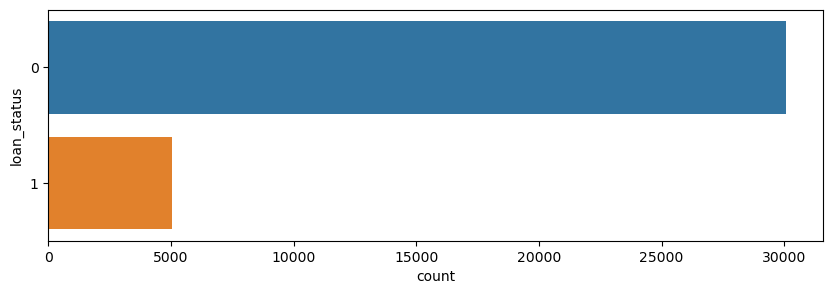

In [119]:
# check for amount of defaulters in the data using countplot
plt.figure(figsize=(10,3))
sns.countplot(y="loan_status", data=Loan)
plt.show()


**From above plot we can see that around 16% i.e. 5062 people are defaulters in total 35152 records**

In [129]:
# function for plotting the count plot features wrt default ratio
def plotUnivariateRatioBar(feature, data=Loan, figsize=(10,5), rsorted=True):
    plt.figure(figsize=figsize)
    if rsorted:
        feature_dimension = sorted(data[feature].unique())
    else:
        feature_dimension = data[feature].unique()
    feature_values = []
    for fd in feature_dimension:
        feature_filter = data[data[feature]==fd]
        feature_count = len(feature_filter[feature_filter["loan_status"]==1])
        feature_values.append(feature_count*100/feature_filter["loan_status"].count())
    plt.bar(feature_dimension, feature_values, color='orange', edgecolor='white')
    plt.title("Loan Defaults wrt "+str(feature)+" feature - countplot")
    plt.xlabel(feature, fontsize=16)
    plt.ylabel("defaulter %", fontsize=16)
    plt.show()

def plotUnivariateBar(x, figsize=(10,5)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_status', data=Loan)
    plt.title("Loan Defaults wrt "+str(x)+" feature - countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()

### a. Categorical Features

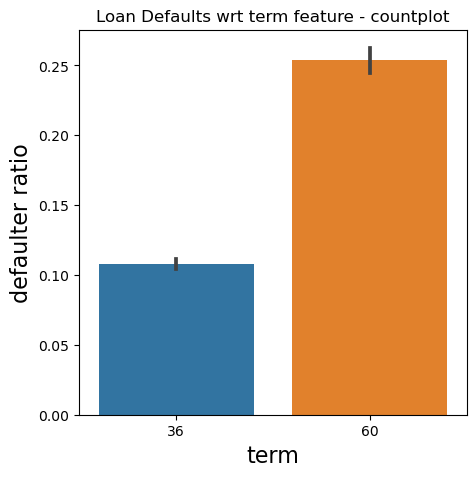

In [159]:
plotUnivariateBar("term", figsize=(5,5))


**From above plot for 'term' we can infer that the defaulters rate is increasing wrt term, hence the chances of loan getting deaulted is less for 36m than 60m**

**is term benificial -> Yes**

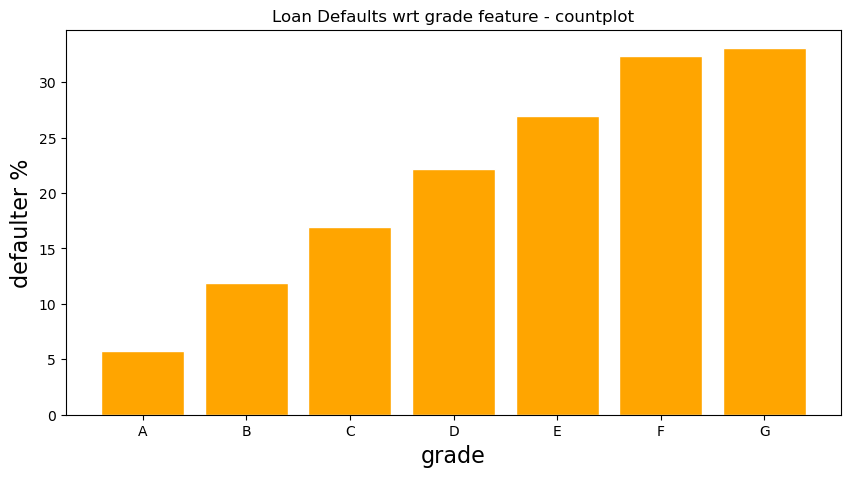

In [160]:
# check for defaulters wrt grade in the data using countplot
plotUnivariateRatioBar("grade")

**From above plot for 'grade' we can infer that the defaulters rate is increasing wrt grade, hence the chances of loan getting deaulted increases with the grade from A moving towards G**

**is grade benificial -> Yes**

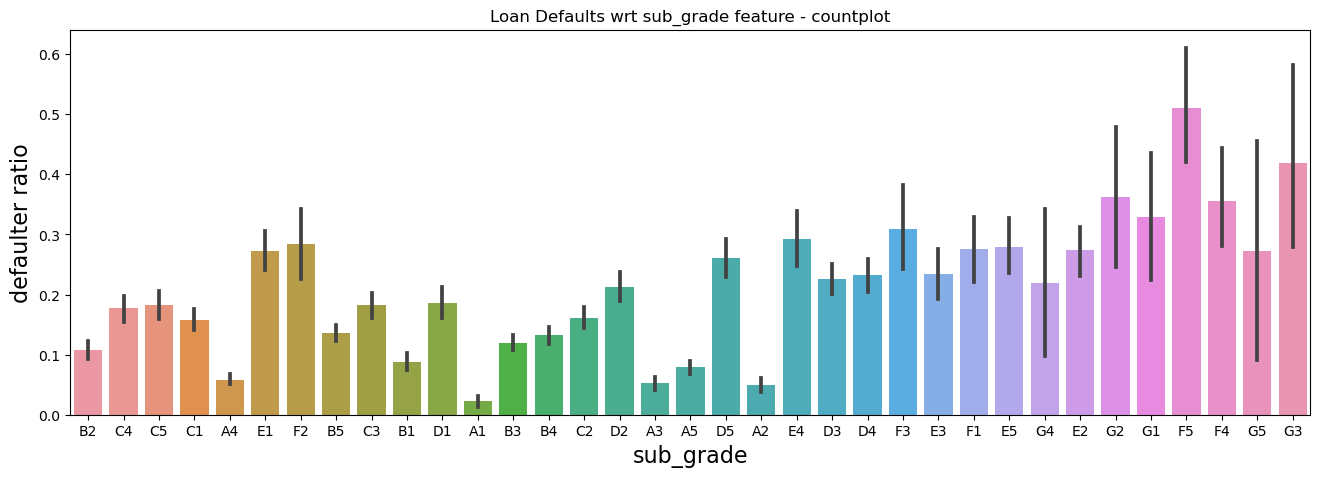

In [161]:
# check for defaulters wrt sub_grade in the data using countplot
plotUnivariateBar("sub_grade", figsize=(16,5))


**From above plot for 'sub_grade' we can infer that the defaulters rate is increasing wrt sub_grade, hence the chances of loan getting deaulted increases with the sub_grade from A1 moving towards G5**

**is sub_grade benificial -> Yes**

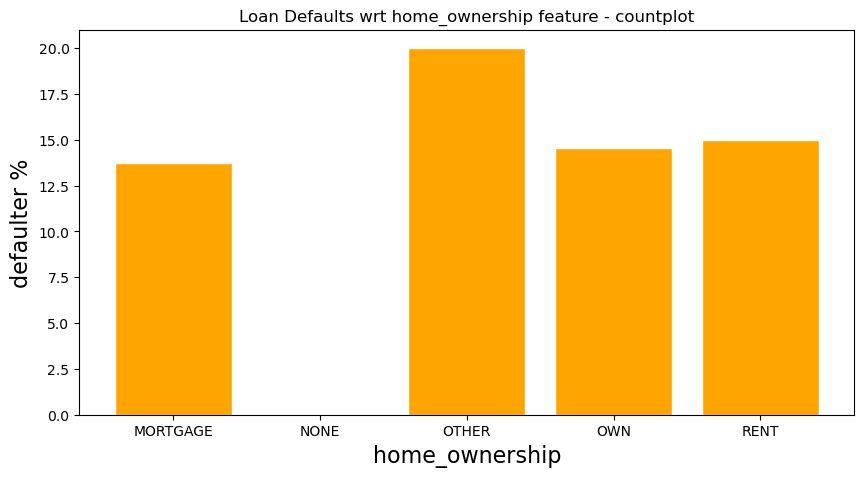

In [162]:
# check for defaulters wrt home_ownership in the data using countplot
plotUnivariateRatioBar("home_ownership")

**From above plot for 'home_ownership' we can infer that the defaulters rate is constant here (it is quite more for OTHERS but we dont know what is in there, so we'll not consider it for analysis), hence defaulter does not depends on home_ownership**

**is home_ownership benificial -> No**

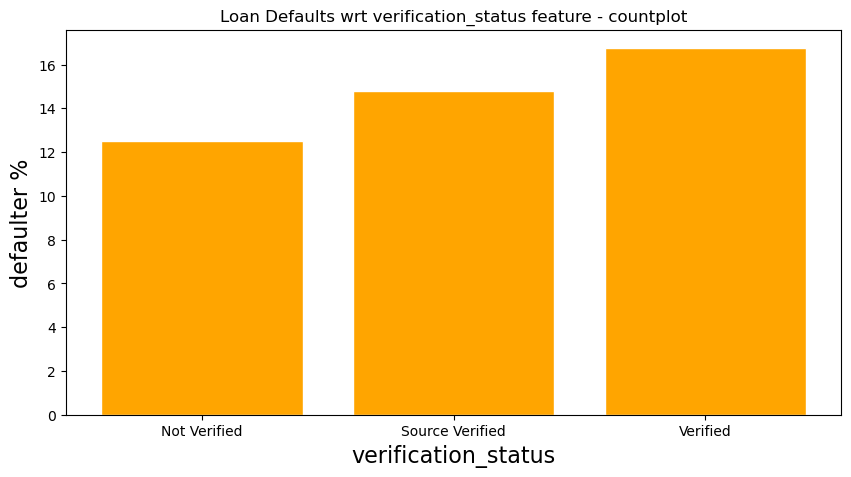

In [163]:
# check for defaulters wrt verification_status in the data using countplot
plotUnivariateRatioBar("verification_status")


**From above plot for 'verification_status' we can infer that the defaulters rate is increasing and is less for Not Verified users than Verified ones, but not useful for analysis as verification is necessary process to do when we give loan.**

**is verification_status benificial -> No**

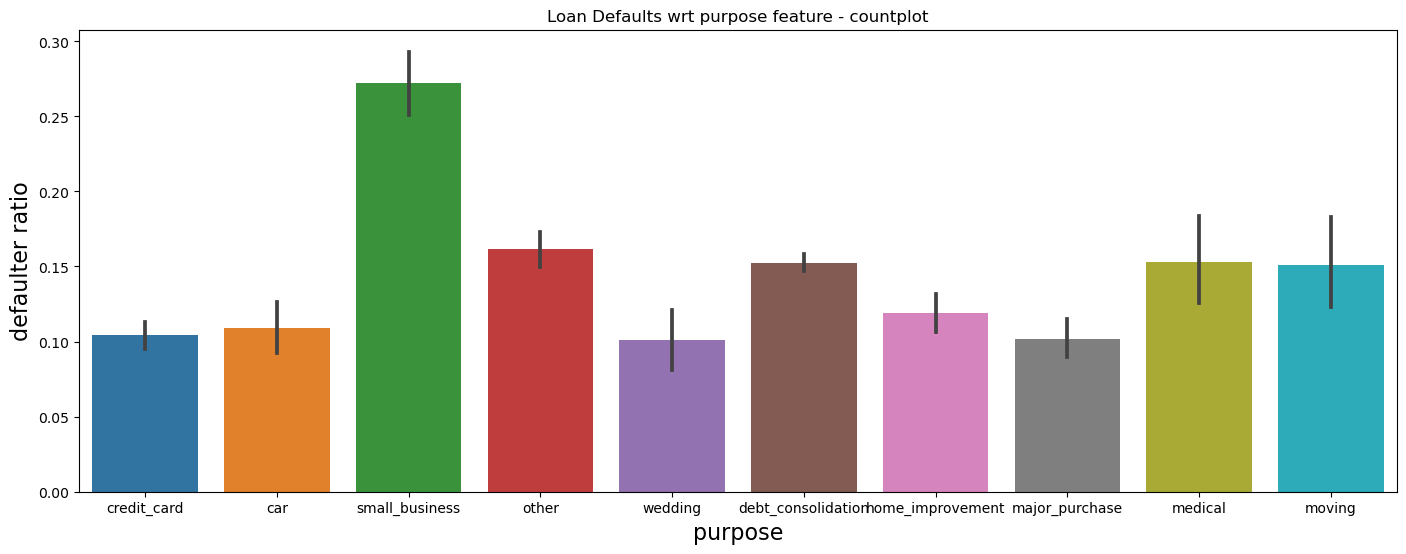

In [164]:
# check for defaulters wrt purpose in the data using countplot
plotUnivariateBar("purpose", figsize=(17,6))

**From above plot for 'purpose' we can infer that the defaulters rate is nearly constant for all purpose type except 'small business', hence rate will depend on purpose of the loan**

**is purpose benificial -> Yes**

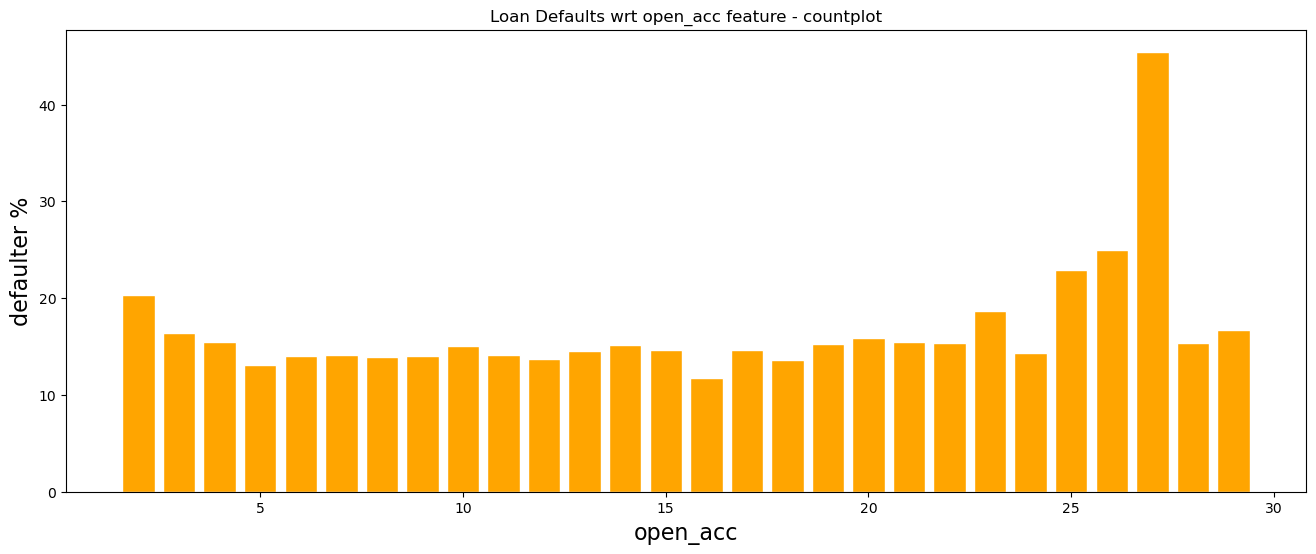

In [165]:
# check for defaulters wrt open_acc in the data using countplot
plotUnivariateRatioBar("open_acc", figsize=(16,6))


**From above plot for 'open_acc' we can infer that the defaulters rate is nearly constant for feature open_acc, hence rate will not depend on open_acc feature**

**is open_acc benificial -> No**



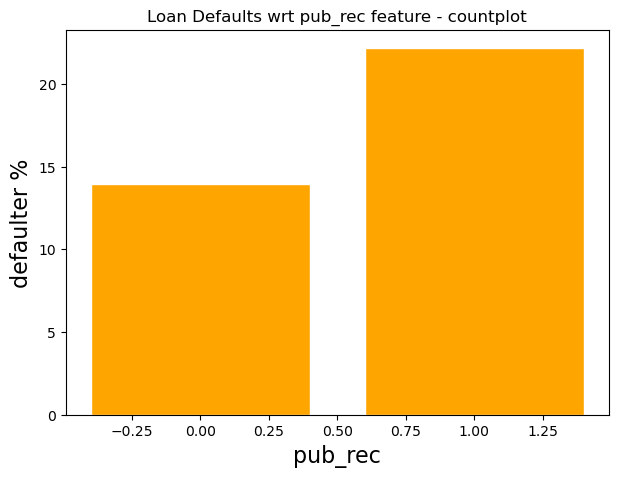

In [166]:
# check for defaulters wrt pub_rec in the data using countplot
plotUnivariateRatioBar("pub_rec",figsize=(7,5))

**From above plot for 'pub_rec' we can infer that the defaulters rate is nearly increasing as it is less for 0 and more for pub_rec with value 1, but as other values are very less as compared to 0 we'll not consider this**

**is pub_rec benificial -> No**

### b. Continuous Features

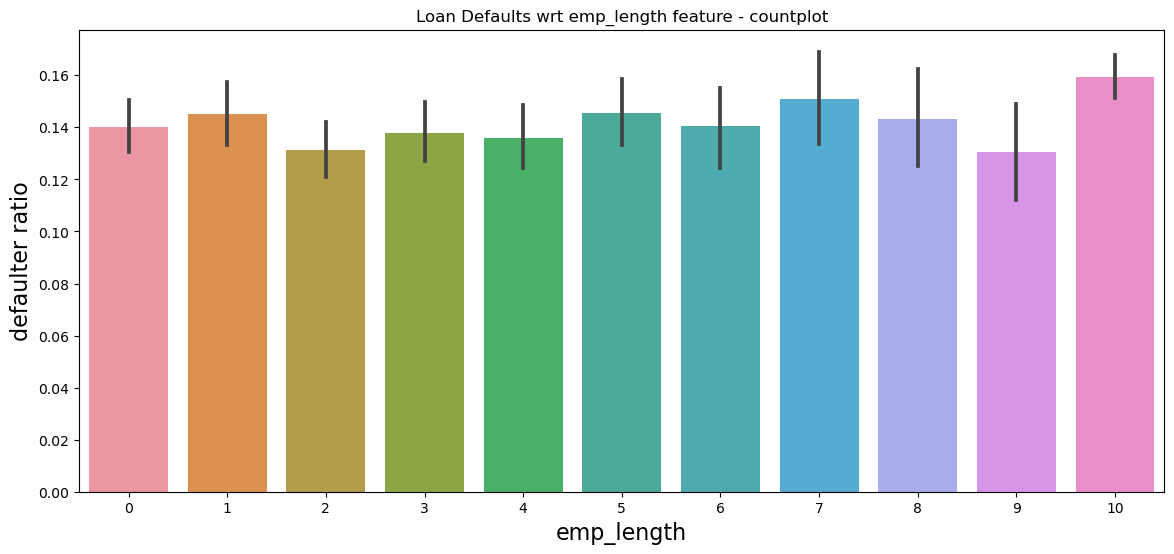

In [167]:
# check for defaulters wrt emp_length in the data using countplot
plotUnivariateBar("emp_length", figsize=(14,6))

**From above plot for 'emp_length' we can infer that the defaulters rate is constant here, hence defaulter does not depends on emp_length**

**is emp_length benificial -> No**

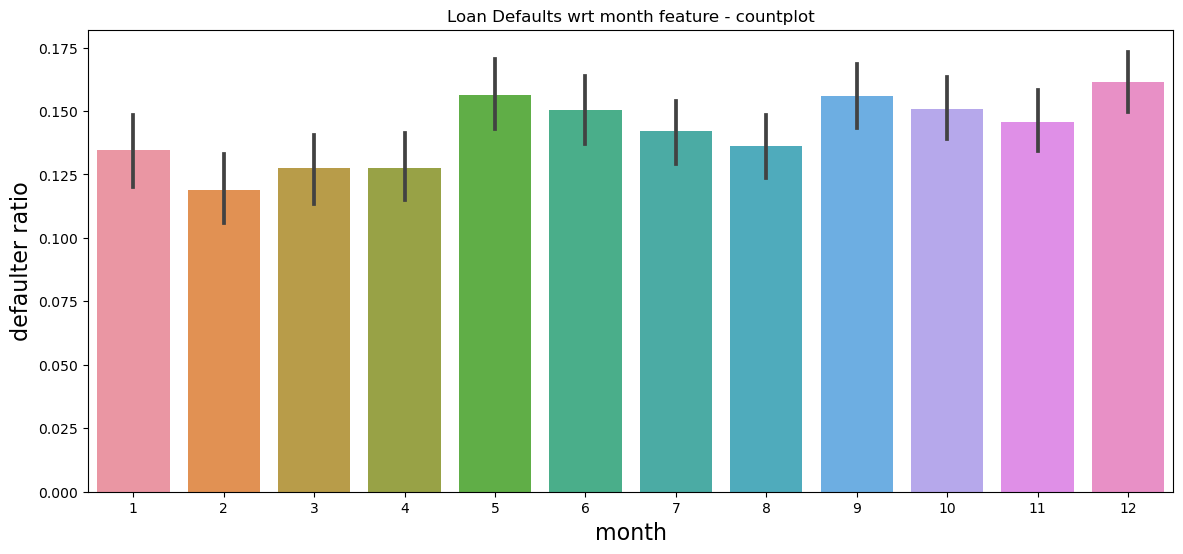

In [168]:
# check for defaulters wrt month in the data using countplot
plotUnivariateBar("month", figsize=(14,6))

**From above plot for 'month' we can infer that the defaulters rate is nearly constant here, not useful**

**is month benificial -> No**

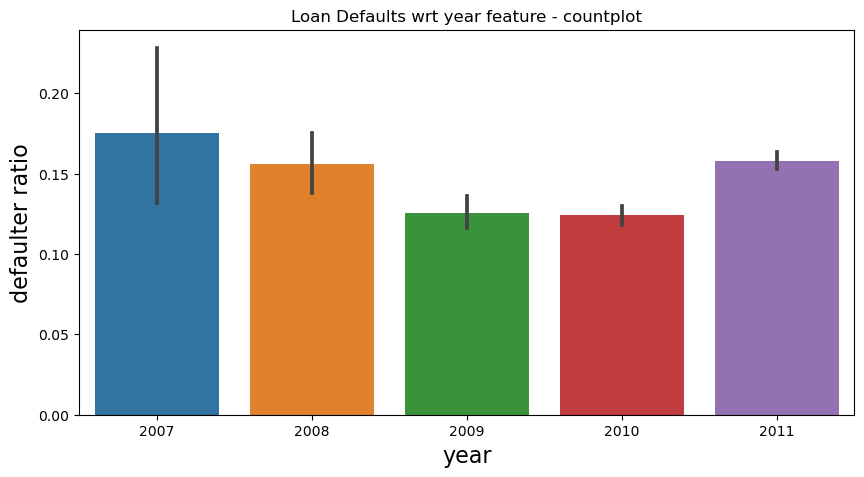

In [169]:
# check for defaulters wrt year in the data using countplot
plotUnivariateBar("year")

**From above plot for 'year' we can infer that the defaulters rate is nearly constant here, not useful**

**is year benificial -> No**

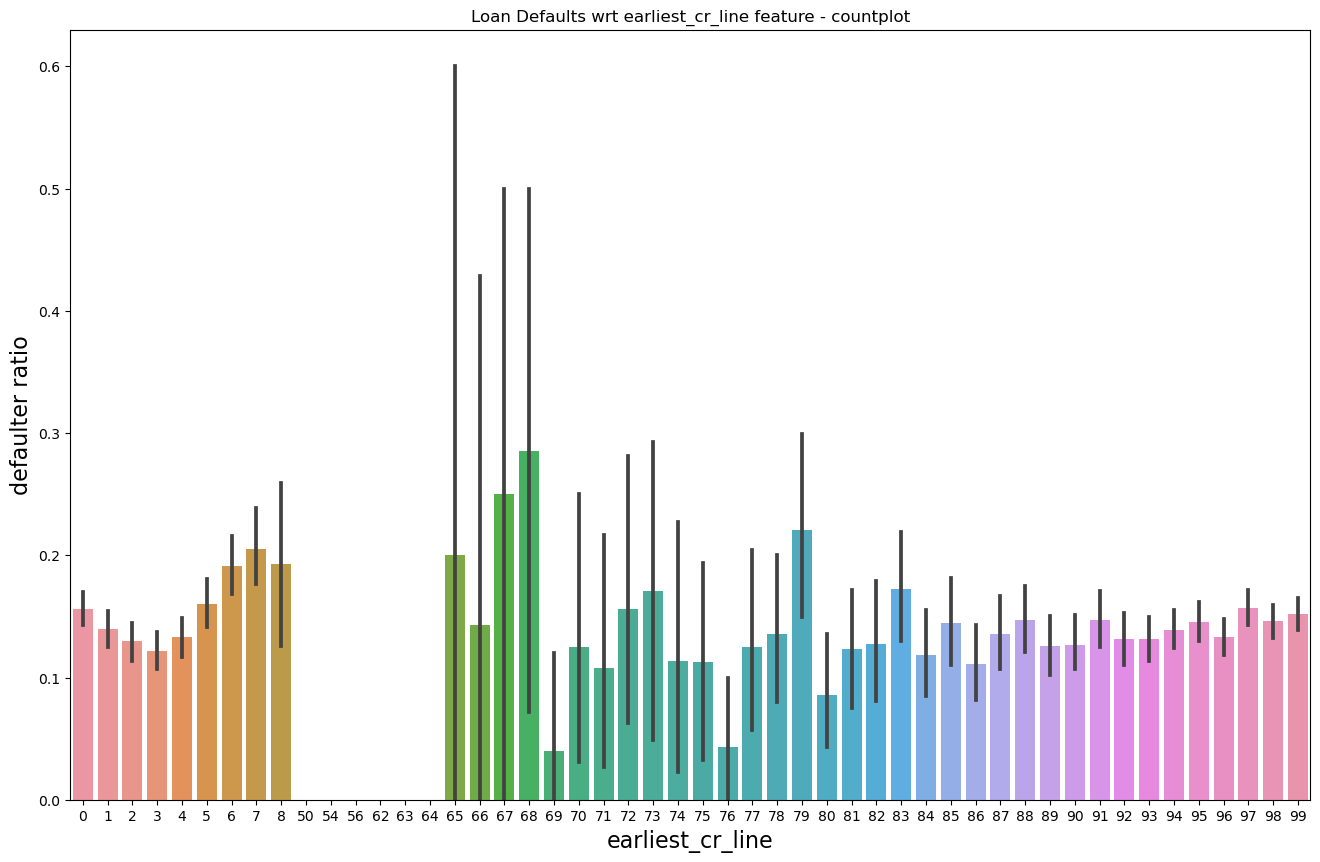

In [170]:
# check for defaulters wrt earliest_cr_line in the data using countplot
plotUnivariateBar("earliest_cr_line", figsize=(16,10))

**From above plot for 'earliest_cr_line' we can infer that the defaulters rate is nearly constant for all purpose type except year around 65, hence rate does not depends on earliest_cr_line of the person**

**is earliest_cr_line benificial -> No**

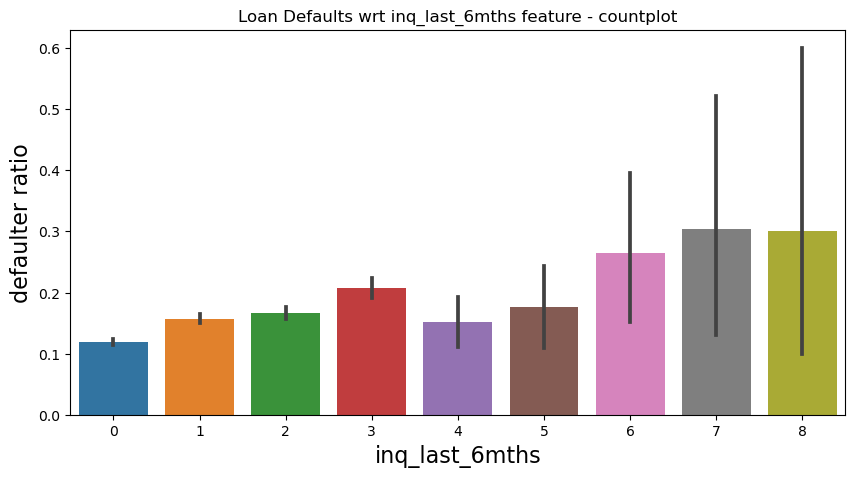

In [171]:
# check for defaulters wrt inq_last_6mths in the data using countplot
plotUnivariateBar("inq_last_6mths")

**From above plot for 'inq_last_6mths' we can infer that the defaulters rate is not consistently increasing with inq_last_6mths type, hence not useful**

**is inq_last_6mths benificial -> No**

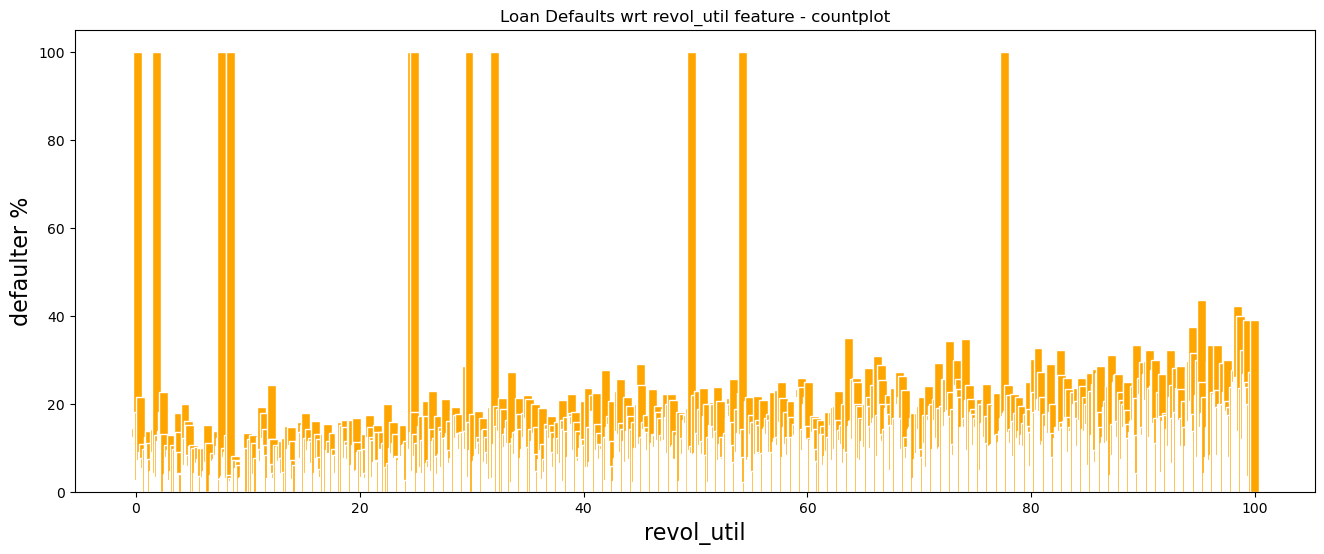

In [172]:
# check for defaulters wrt revol_util in the data using countplot
plotUnivariateRatioBar("revol_util", figsize=(16,6))

**From above plot for 'revol_util' we can infer that the defaulters rate is fluctuating where some have complete 100% ratio for defaulter and is increasing as the magnitude increases, hence rate will depend on revol_util feature**

**is revol_util benificial -> No**

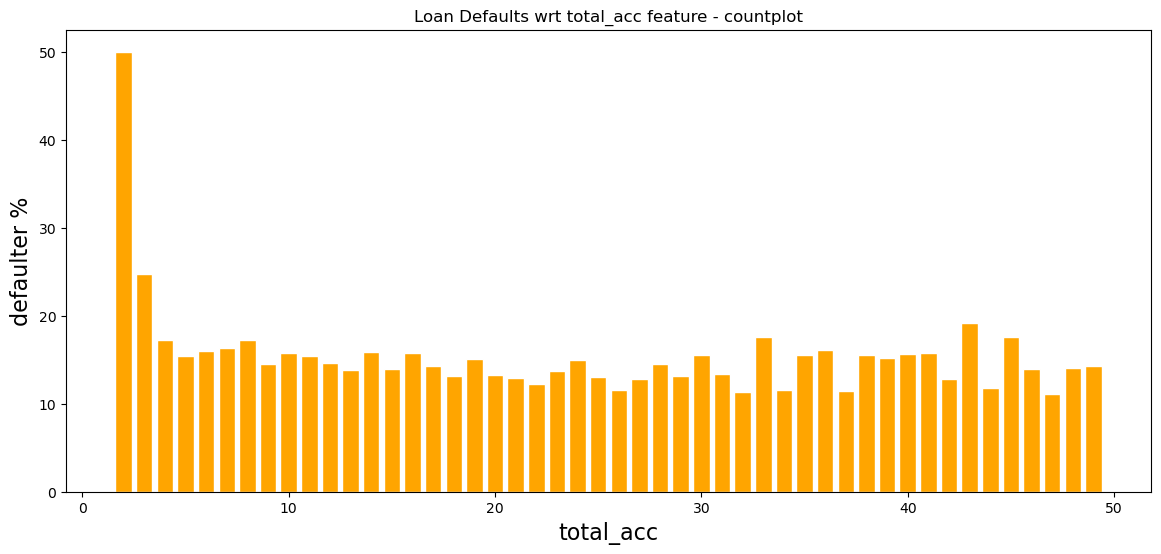

In [173]:
# check for defaulters wrt total_acc in the data using countplot
plotUnivariateRatioBar("total_acc", figsize=(14,6))

**From above plot for 'total_acc' we can infer that the defaulters rate is nearly constant for all total_acc values, hence rate will not depend on total_acc feature**

**is total_acc benificial -> No**

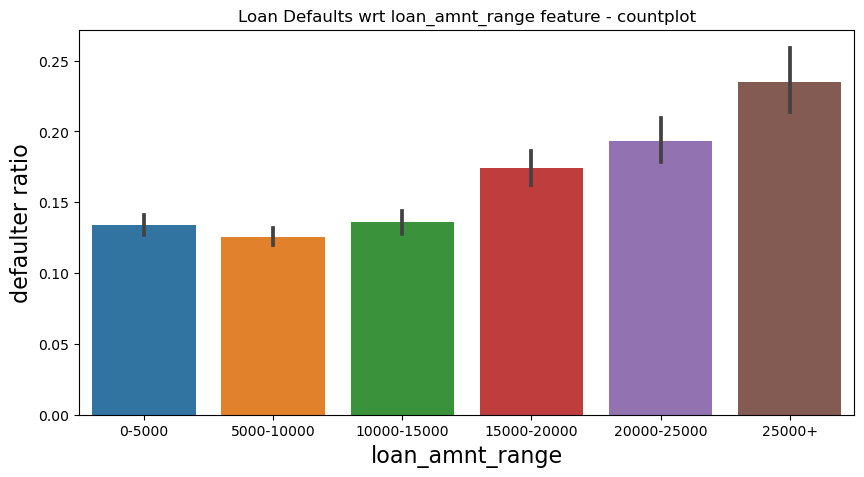

In [174]:
# check for defaulters wrt loan_amnt_range in the data using countplot
plotUnivariateBar("loan_amnt_range")

**From above plot for 'loan_amnt_range' we can infer that the defaulters rate is increasing loan_amnt_range values, hence rate will depend on loan_amnt_range feature**

**is loan_amnt_range benificial -> Yes**

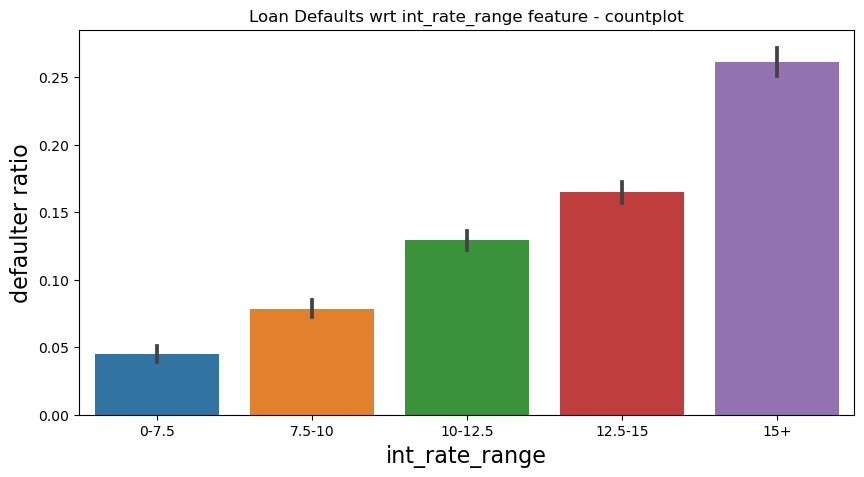

In [175]:
# check for defaulters wrt int_rate_range in the data using countplot
plotUnivariateBar("int_rate_range")

**From above plot for 'int_rate_range' we can infer that the defaulters rate is decreasing with int_rate_range values, hence rate will depend on int_rate_range feature**

**is int_rate_range benificial -> Yes**

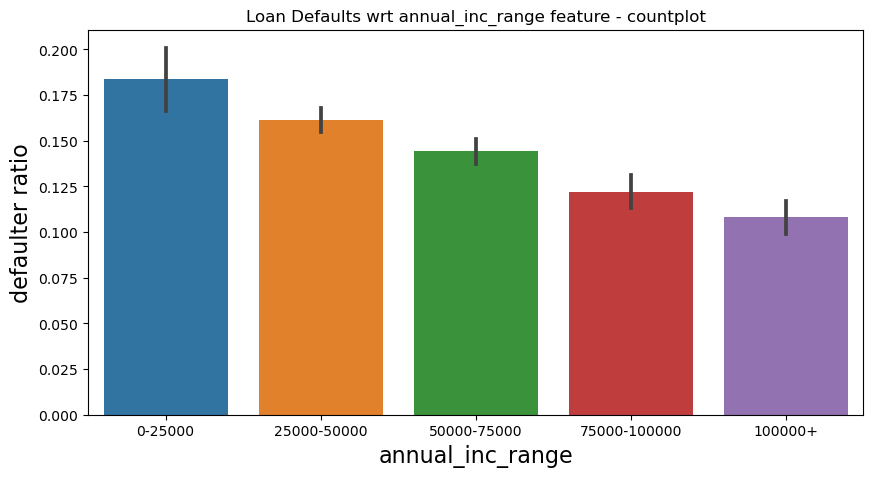

In [176]:
# check for defaulters wrt annual_inc_range in the data using countplot
plotUnivariateBar("annual_inc_range")

**From above plot for 'annual_inc_range' we can infer that the defaulters rate is decreasing as with annual_inc_range values, hence rate will depend on annual_inc_range feature**

**is annual_inc_range benificial -> Yes**

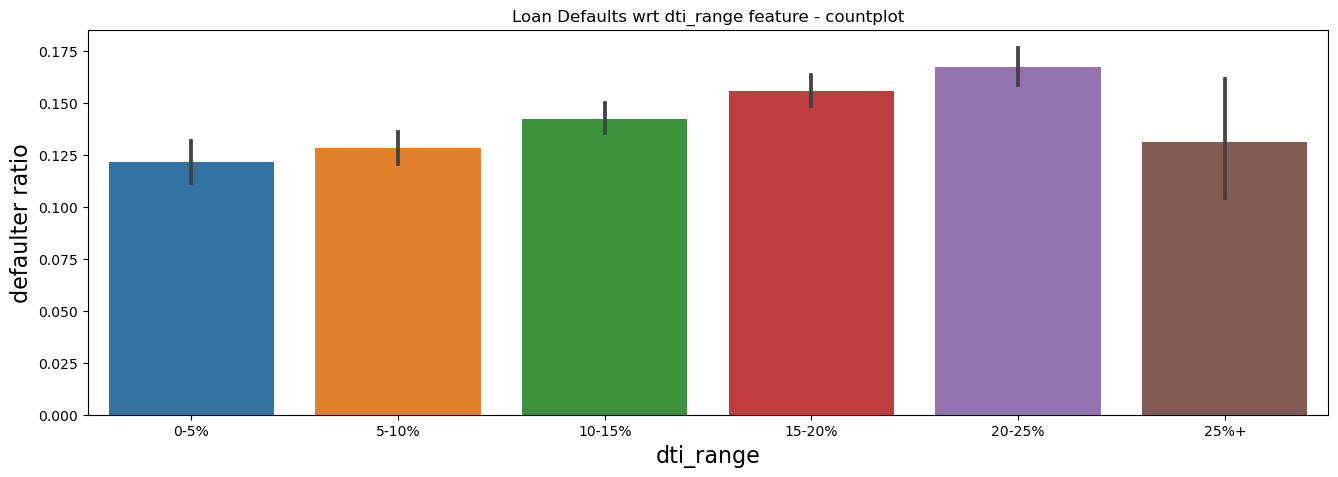

In [177]:
# check for defaulters wrt dti_range in the data using countplot
plotUnivariateBar("dti_range", figsize=(16,5))

**From above plot for 'dti_range' we can infer that the defaulters rate is increasing as with dti_range values, hence rate will depend on dti_range feature**

**is dti_range benificial -> Yes**

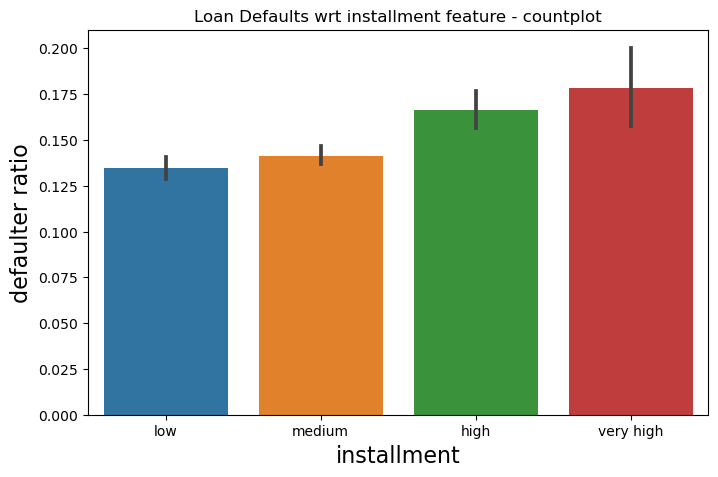

In [178]:
# check for defaulters wrt installment range in the data using countplot
plotUnivariateBar("installment", figsize=(8,5))

**From above plot for 'installment' we can infer that the defaulters rate is increasing as with installment values, hence rate will depend on dti_range feature**

**is installment benificial -> Yes**

<font color = red, size=5>Hence, important feature which are effecting the defaulters rate from above Univariate analysis are:
    
<font color = blue, size=5>term, grade, purpose, pub_rec, revol_util, funded_amnt_inv, int_rate, annual_inc, dti, installment

## 2. Bivariate Analysis

In [180]:
# function to plot scatter plot for two features
def plotScatter(x, y):
    plt.figure(figsize=(16,6))
    sns.scatterplot(x=x, y=y, hue="loan_status", data=Loan)
    plt.title("Scatter plot between "+x+" and "+y)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
    
def plotBivariateBar(x, hue, figsize=(16,6)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_status', hue=hue, data=Loan)
    plt.title("Loan Default ratio wrt "+x+" feature for hue "+hue+" in the data using countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()

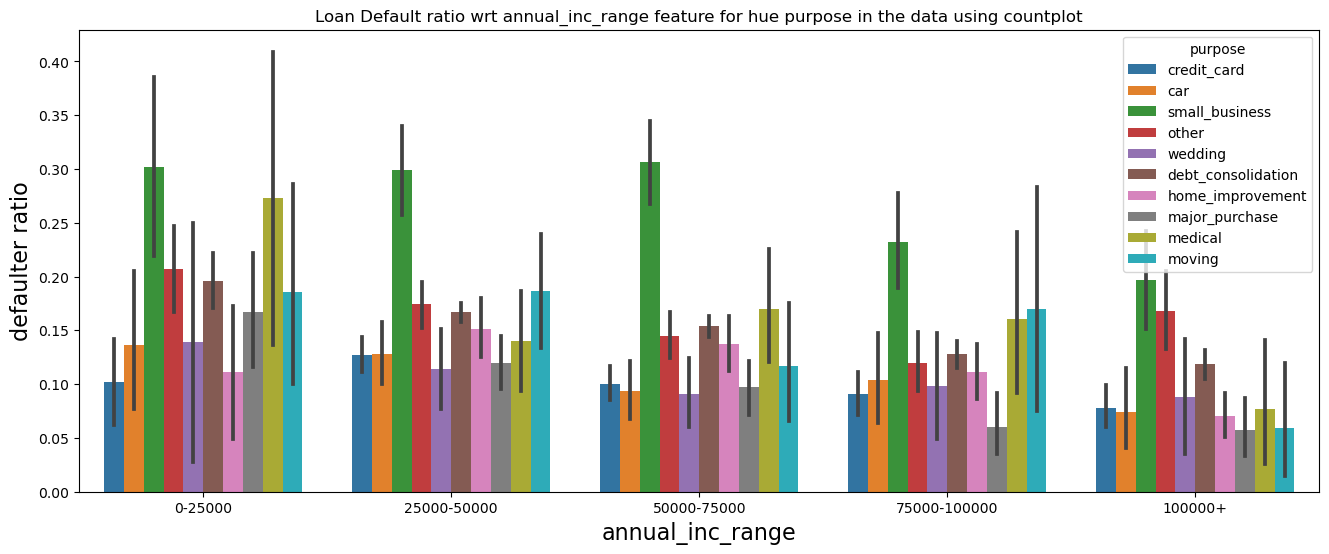

In [181]:
# check for defaulters wrt annual_inc and purpose in the data using countplot
plotBivariateBar("annual_inc_range", "purpose")

**From above plot, we can infer it doesn't shows any correlation**

**related - No**

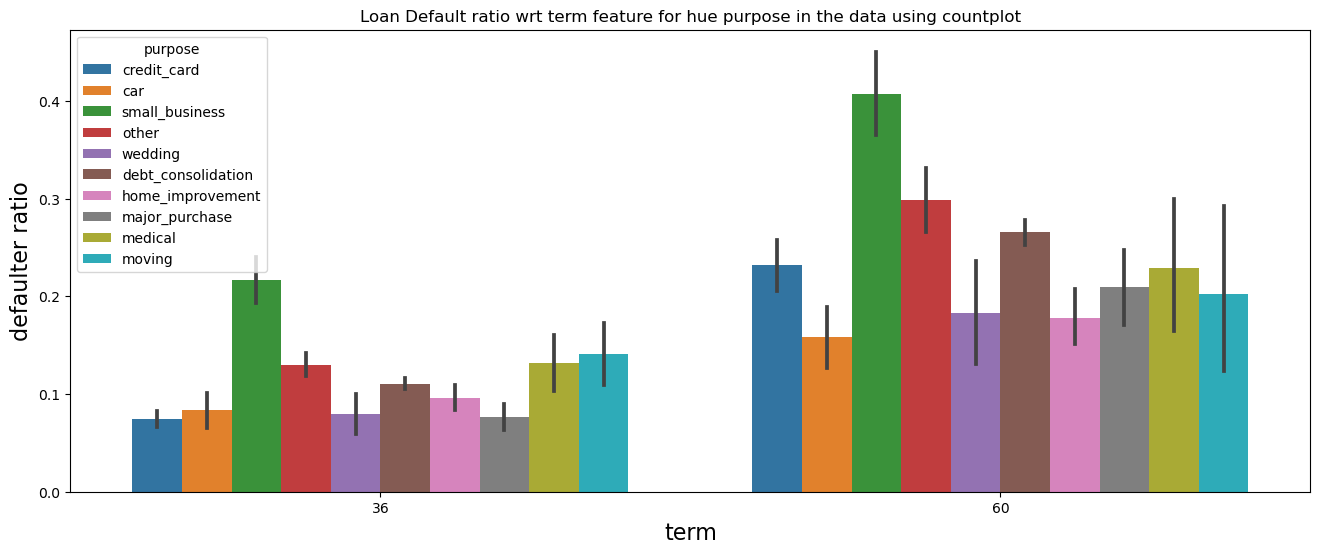

In [182]:
# check for defaulters wrt term and purpose in the data using countplot
plotBivariateBar("term", "purpose")


**As we can see straight lines on the plot, default ratio increases for every purpose wrt term**

**related - Yes**

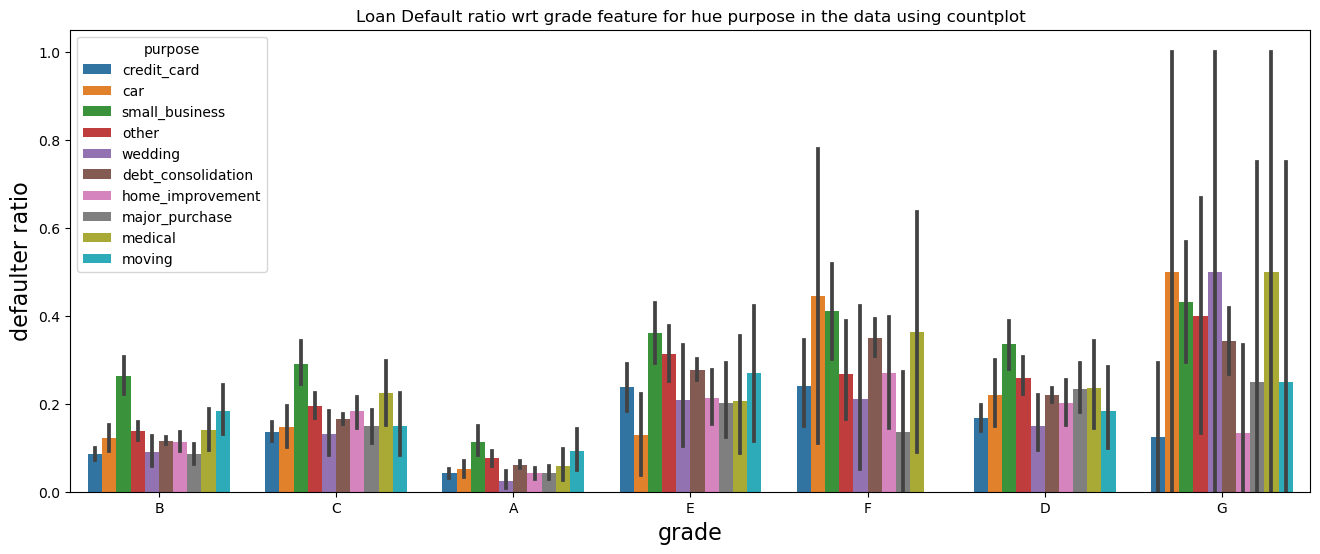

In [183]:
# check for defaulters wrt grade and purpose in the data using countplot
plotBivariateBar("grade", "purpose")

**As we can see straight lines on the plot, default ratio increases for every purpose wrt grade**

**related - Yes**

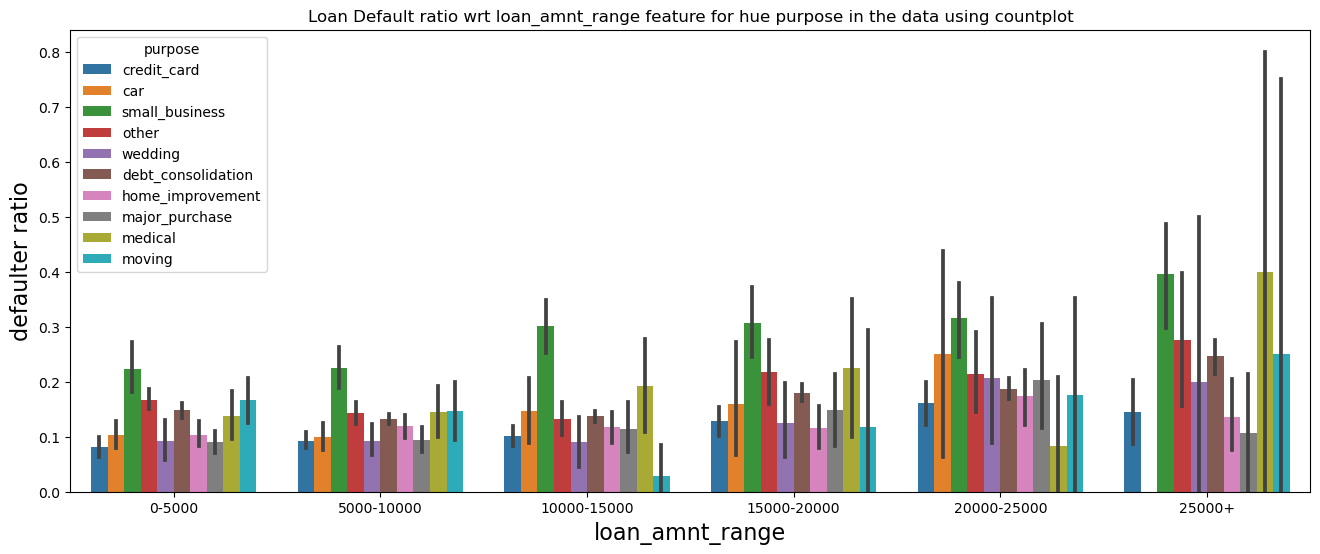

In [184]:
# check for defaulters wrt loan_amnt_range and purpose in the data using countplot
plotBivariateBar("loan_amnt_range", "purpose")

**As we can see straight lines on the plot, default ratio increases for every purpose wrt loan_amnt_range**

**related - Yes**

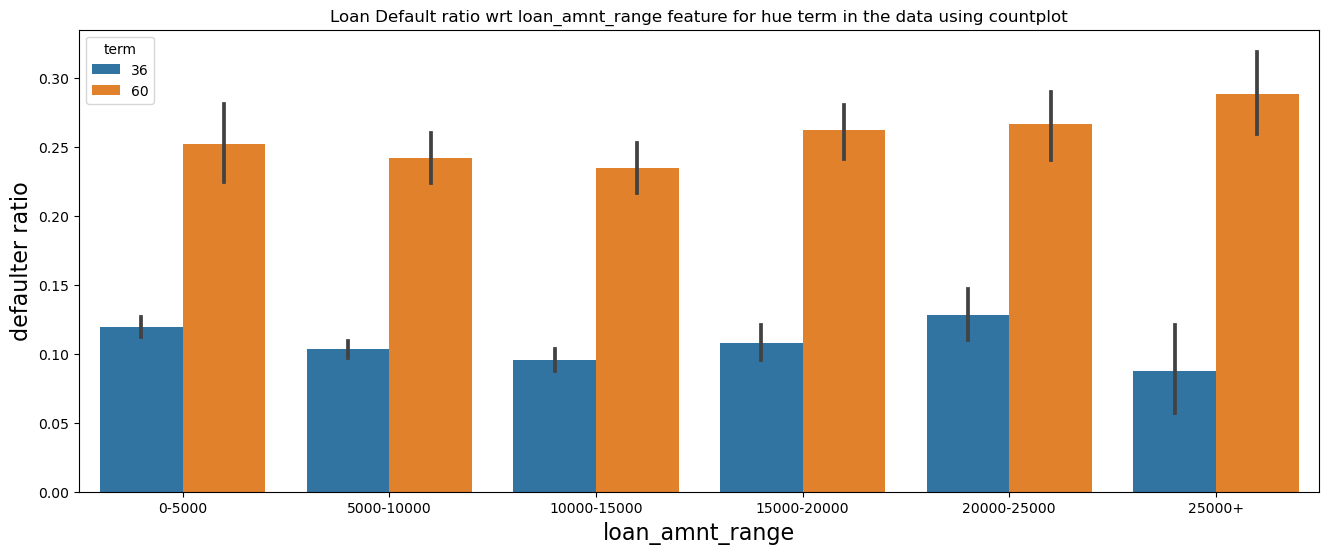

In [185]:
# check for defaulters wrt loan_amnt_range and term in the data using countplot
plotBivariateBar("loan_amnt_range", "term")

**As we can see straight lines on the plot, default ratio increases for every term wrt loan_amnt_range**

**related - Yes**

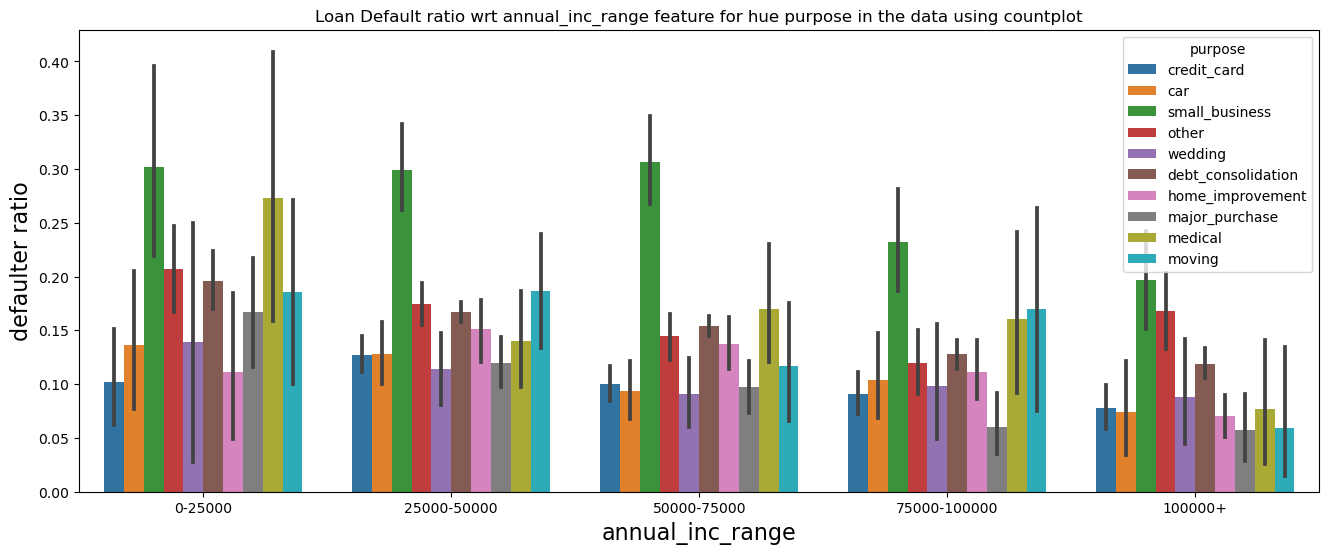

In [188]:
# check for defaulters wrt annual_inc_range and purpose in the data using countplot
plotBivariateBar("annual_inc_range", "purpose")

**As we can see straight lines on the plot, default ratio decreases for every purpose wrt annual_inc_range**

**related - Yes**

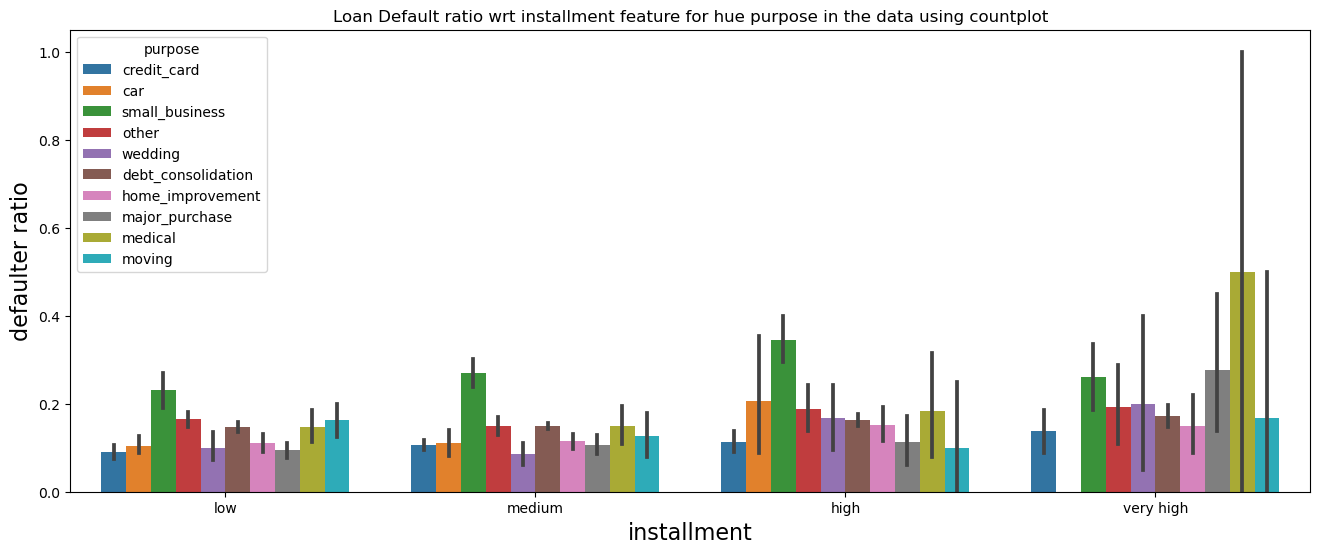

In [189]:
# check for defaulters wrt annual_inc_range and purpose in the data using countplot
plotBivariateBar("installment", "purpose")

**As we can see straight lines on the plot, default ratio increases for every purpose wrt installment except for small_business**

**related - Yes**

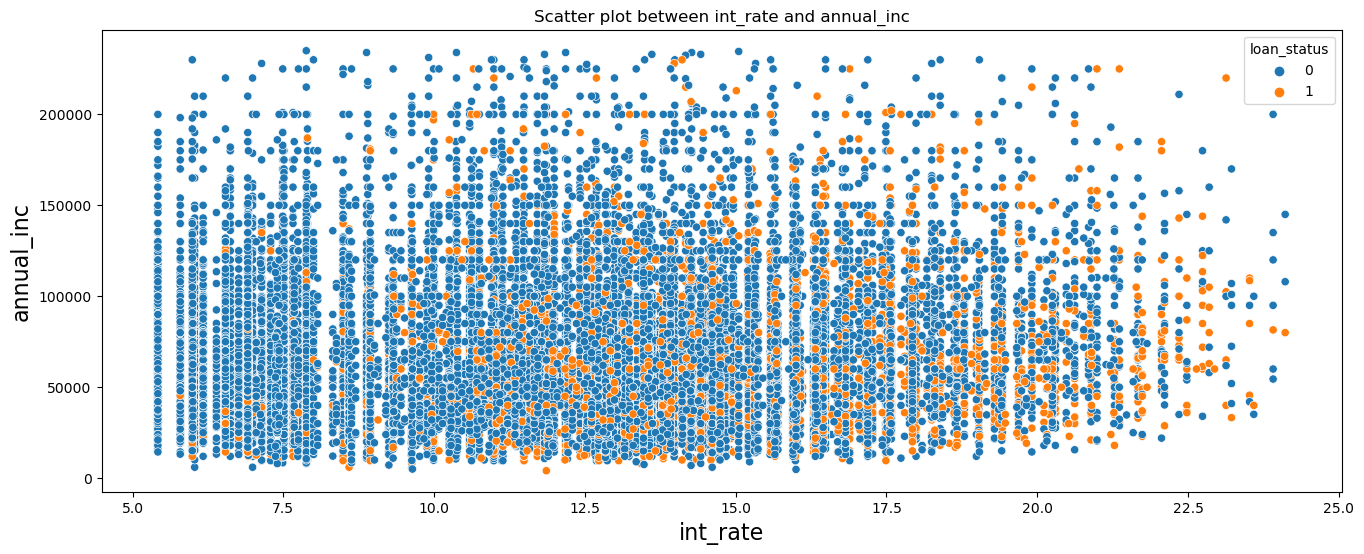

In [190]:
# check for defaulters wrt loan_amnt_range in the data using countplot
plotScatter("int_rate", "annual_inc")

**As we can see straight lines on the plot, there is no relation between above mentioned features**

**related - No**

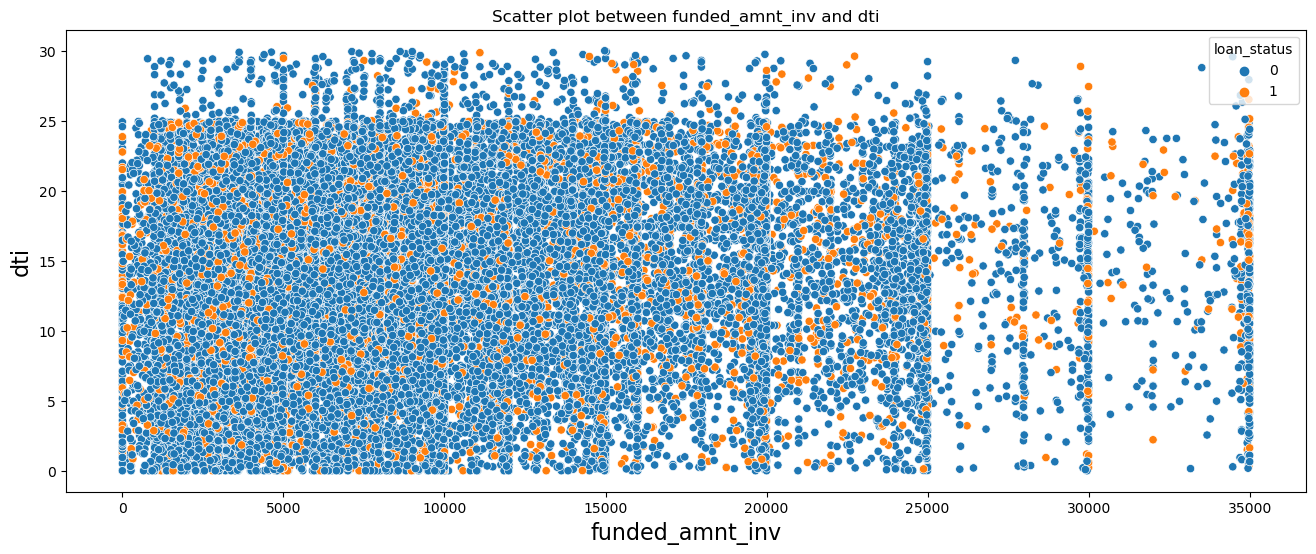

In [191]:
# plot scatter for funded_amnt_inv with dti
plotScatter("funded_amnt_inv", "dti")

**As we can see straight lines on the plot, there is no relation between above mentioned features**

**related - No**

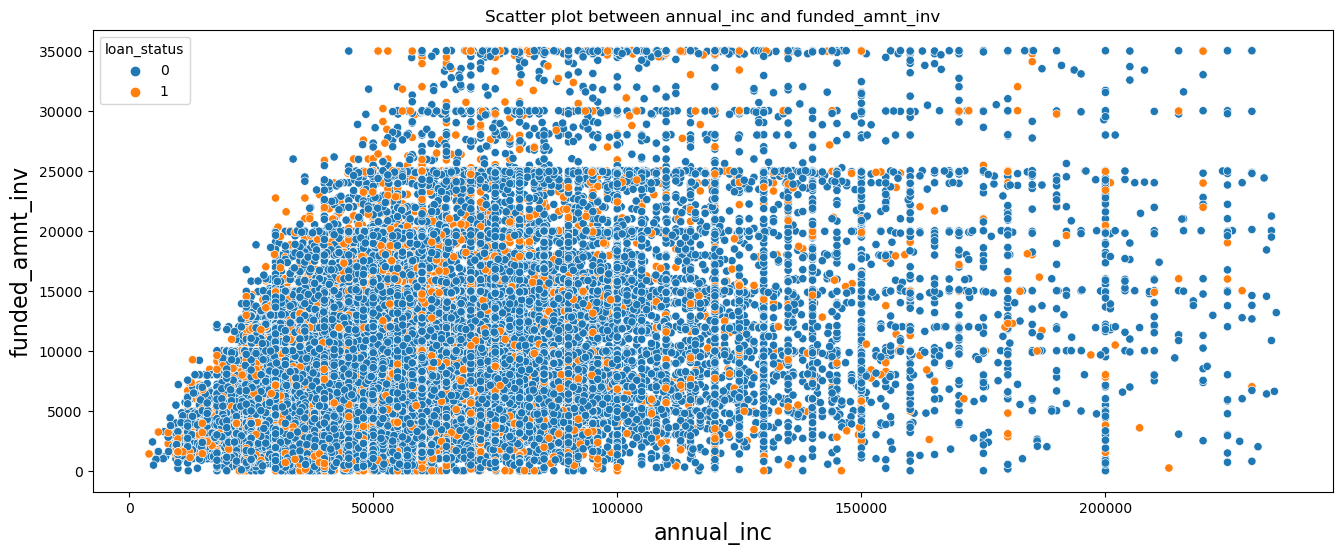

In [192]:
# plot scatter for funded_amnt_inv with annual_inc
plotScatter("annual_inc", "funded_amnt_inv")

**As we can see slope pattern on the plot, there is positive relation between above mentioned features**

**related - Yes**

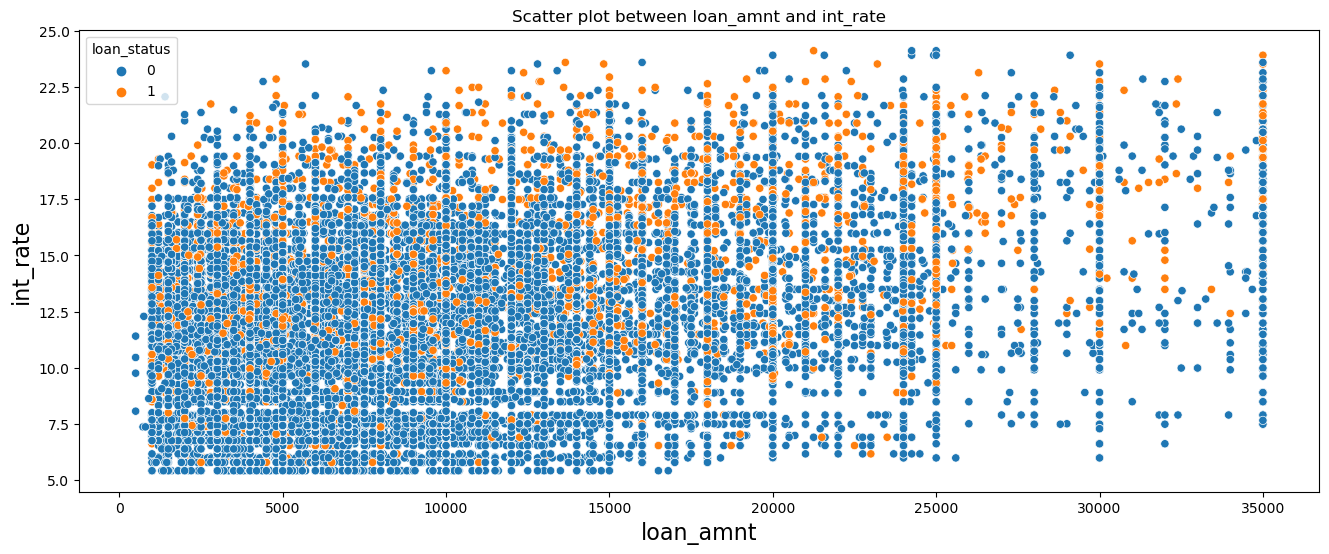

In [193]:
# plot scatter for loan_amnt with int_rate
plotScatter("loan_amnt", "int_rate")

**As we can see straight line patterns on the plot, there is no relation between above mentioned features**

**related - No**

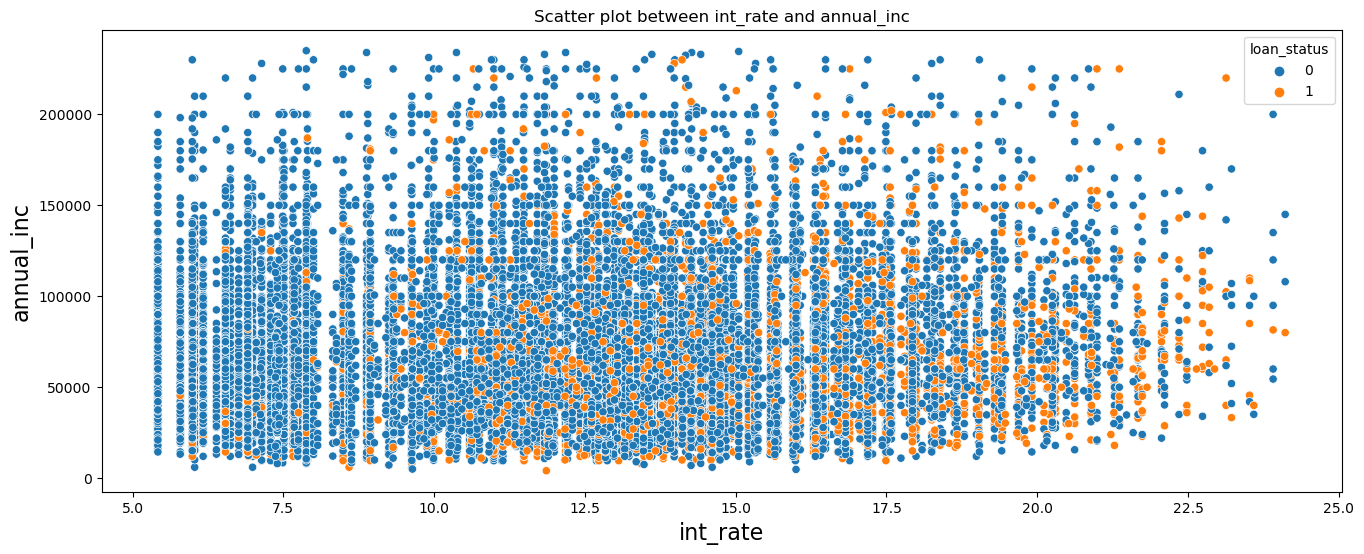

In [194]:
# plot scatter for int_rate with annual_inc
plotScatter("int_rate", "annual_inc")

**As we can see negative correlation pattern with reduced density on the plot, there is some relation between above mentioned features**

**related - Yes**

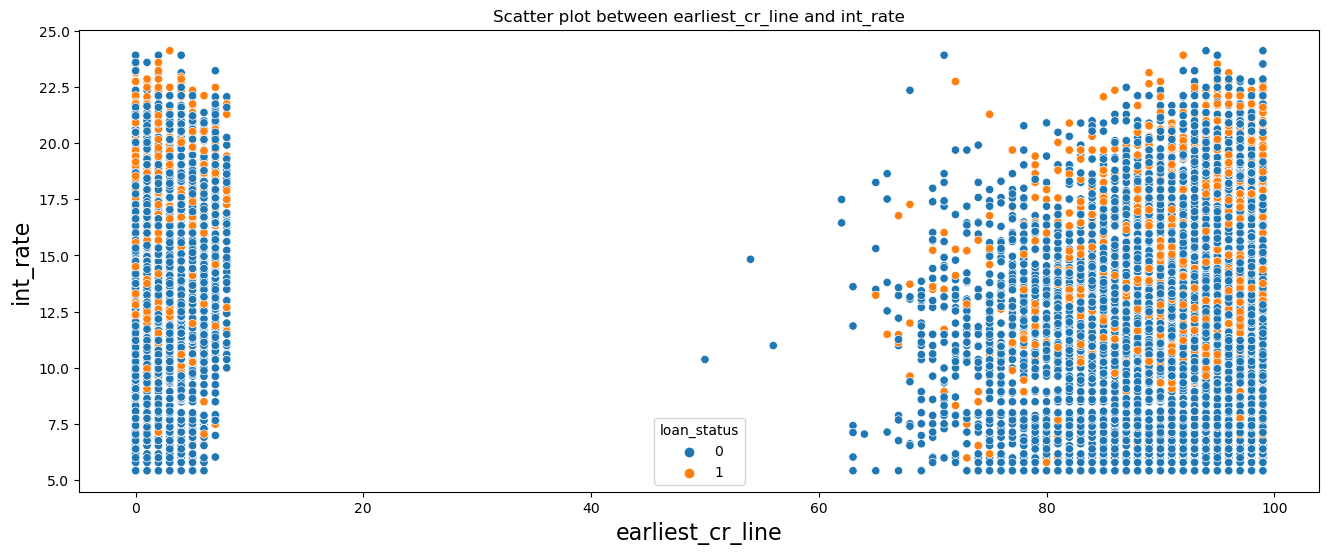

In [195]:
# plot scatter for earliest_cr_line with int_rate
plotScatter("earliest_cr_line", "int_rate")

**As we can see positive correlation pattern with increasing density on the plot, there is co-relation between above mentioned features**

**related - Yes**

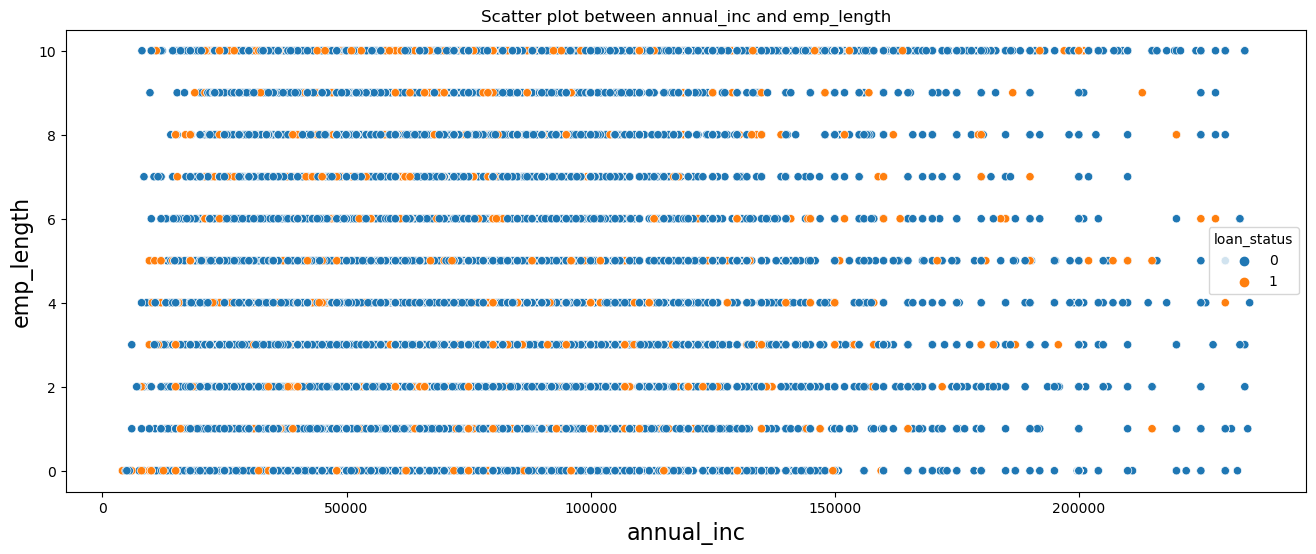

In [198]:
# plot scatter for annual_inc with emp_length
plotScatter("annual_inc", "emp_length")

**As we can see straight line patterns on the plot, there is no relation between above mentioned features**

**related - No**

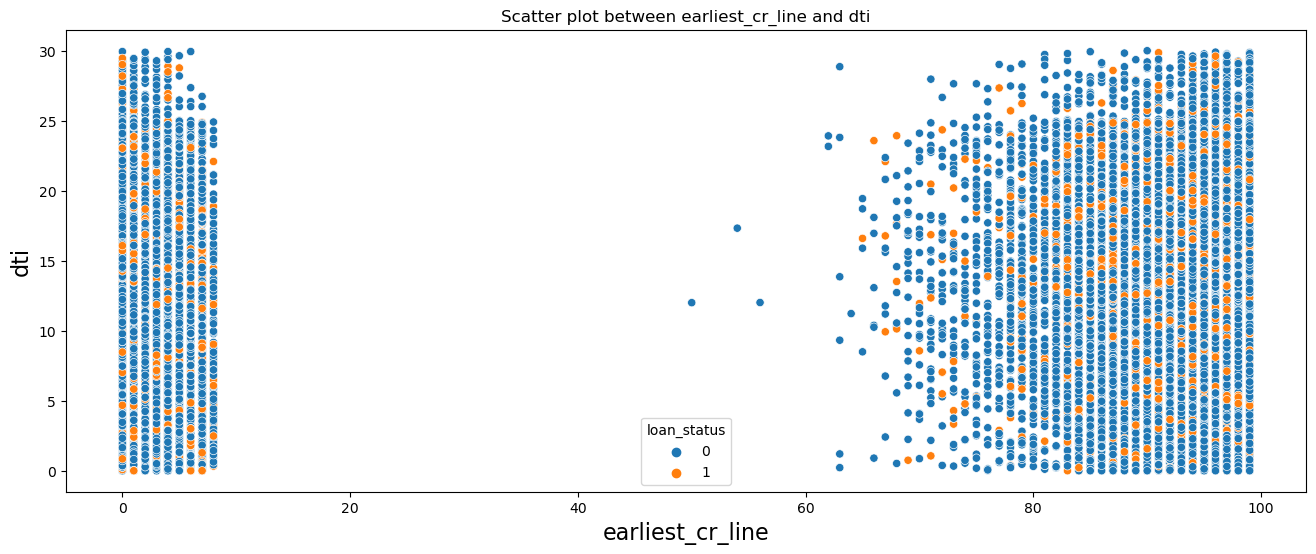

In [199]:
# plot scatter for earliest_cr_line with dti
plotScatter("earliest_cr_line", "dti")


**As we can see straight line patterns on the plot, there is no relation between above mentioned features**

**related - No**

In [201]:
sorted(Loan["grade"].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [205]:
# function to plot boxplot for comparing two features
def plotBox(x, y, hue="loan_status"):
    plt.figure(figsize=(16,6))
    sns.boxplot(x=x, y=y, data=Loan, hue=hue, order=sorted(Loan[x].unique()))
    plt.title("Box plot between "+x+" and "+y+" for each "+hue)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
    plt.figure(figsize=(16,8))
    sns.violinplot(x=x, y=y, data=Loan, hue=hue, order=sorted(Loan[x].unique()))
    plt.title("Violin plot between "+x+" and "+y+" for each "+hue)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()

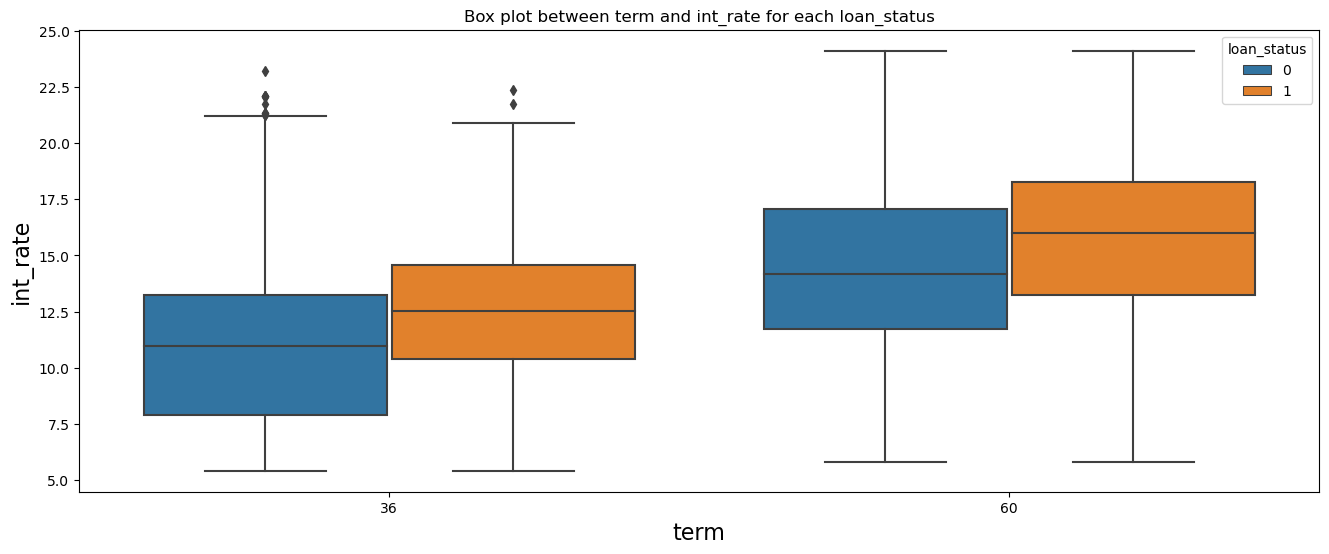

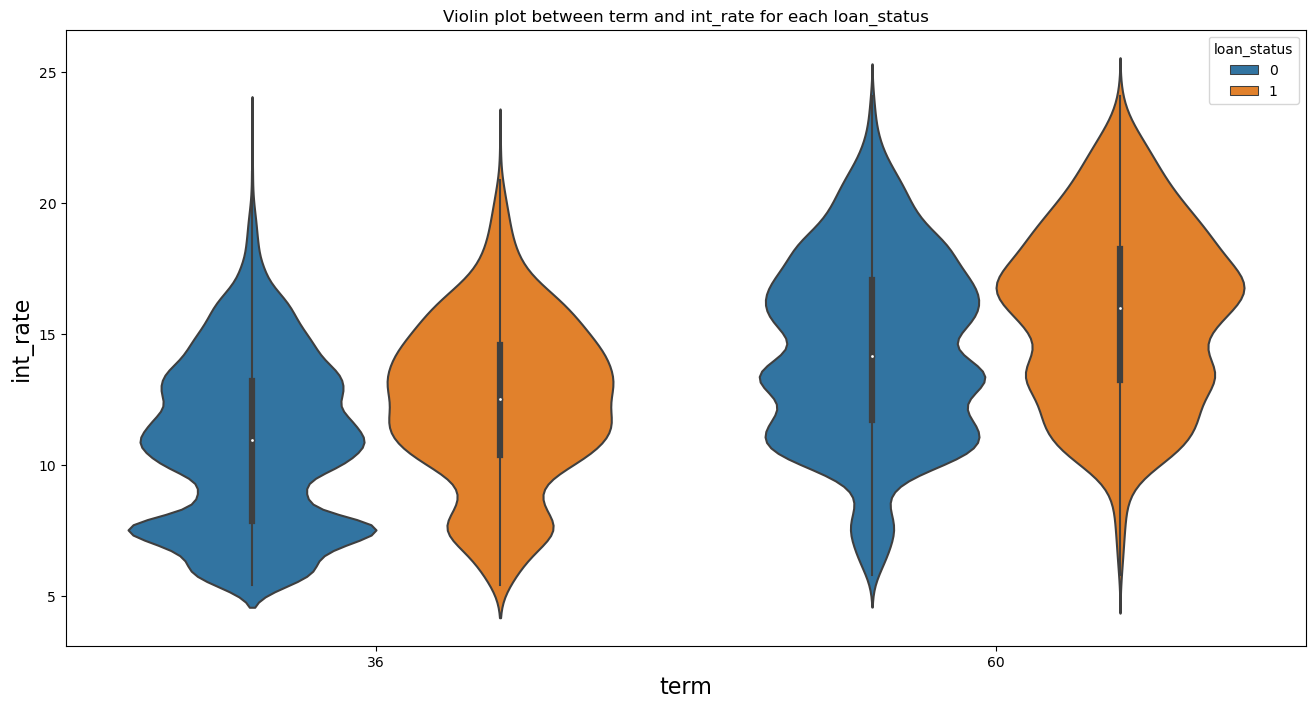

In [206]:
# plot box for term vs int_rate for each loan_status
plotBox("term", "int_rate")

**int_rate increases with term on loan and the chances of default also increases**

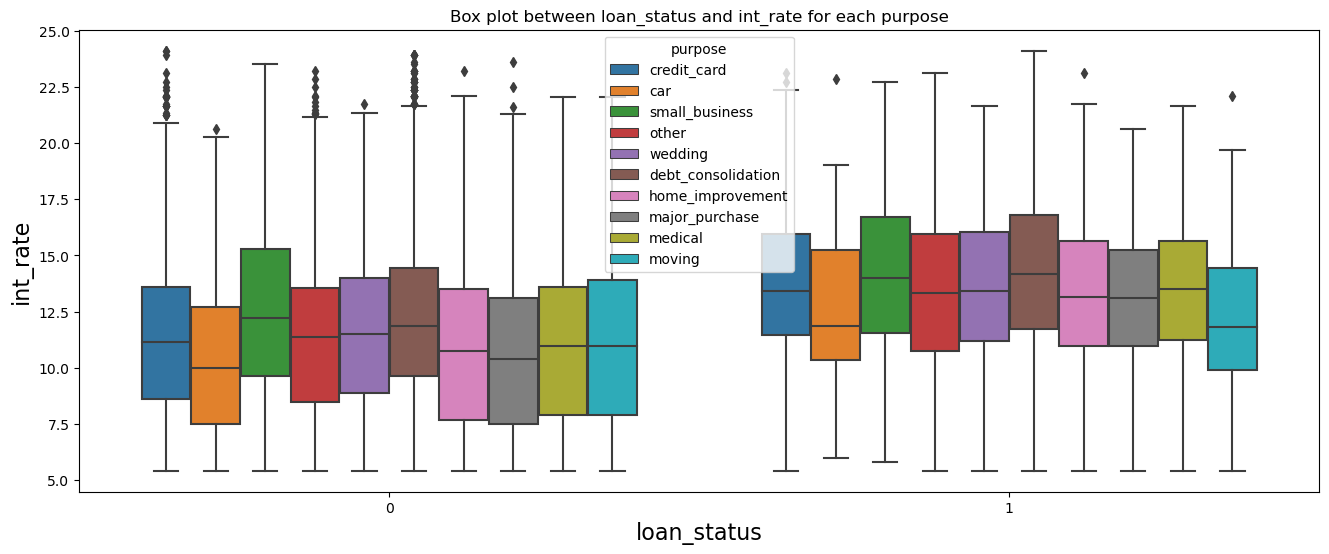

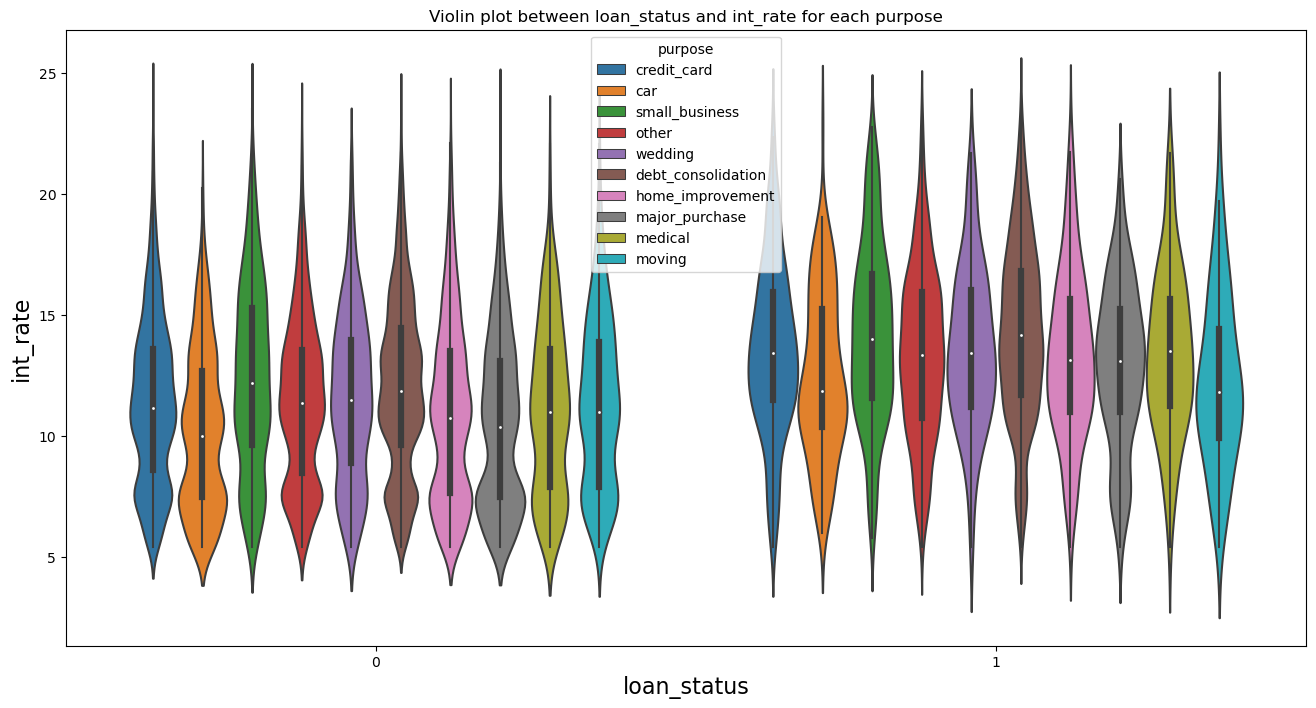

In [207]:
# plot box for loan_status vs int_rate for each purpose
plotBox("loan_status", "int_rate", hue="purpose")

**int_rate is quite high where the loan is defaulted for every purpose value**

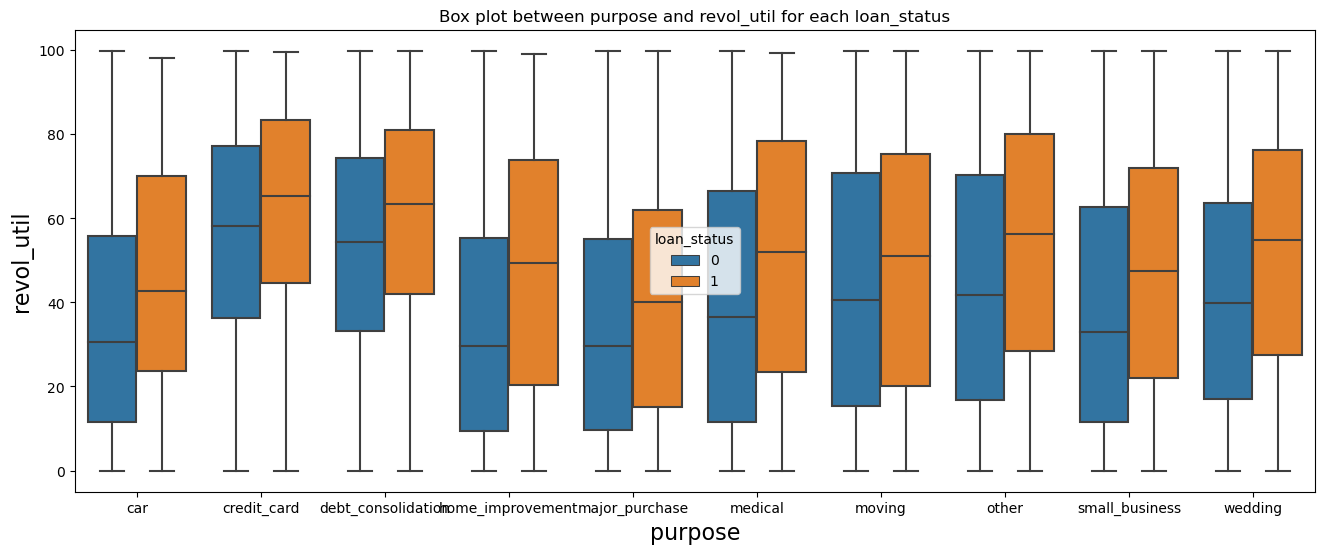

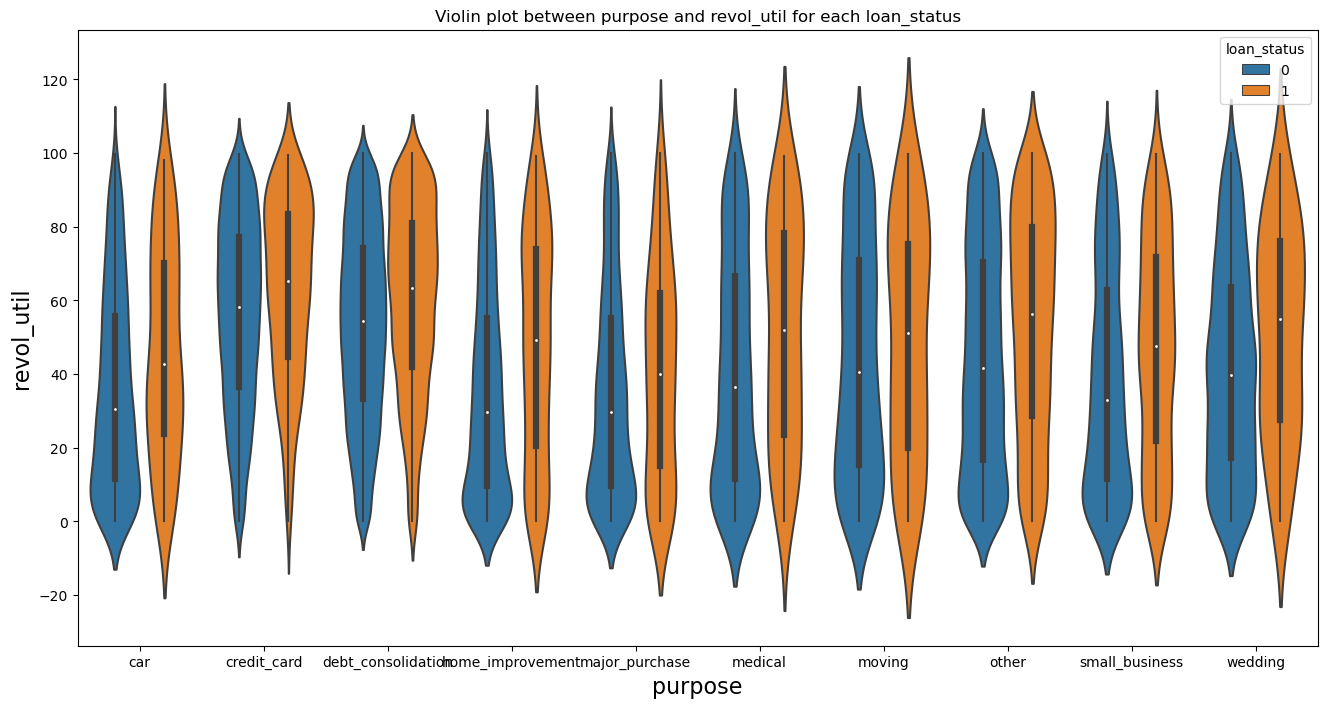

In [208]:
# plot box for purpose vs revo_util for each status
plotBox("purpose", "revol_util")

**revol_util is more for every purpose value where the loan is defaulted and quite high for credit_card**

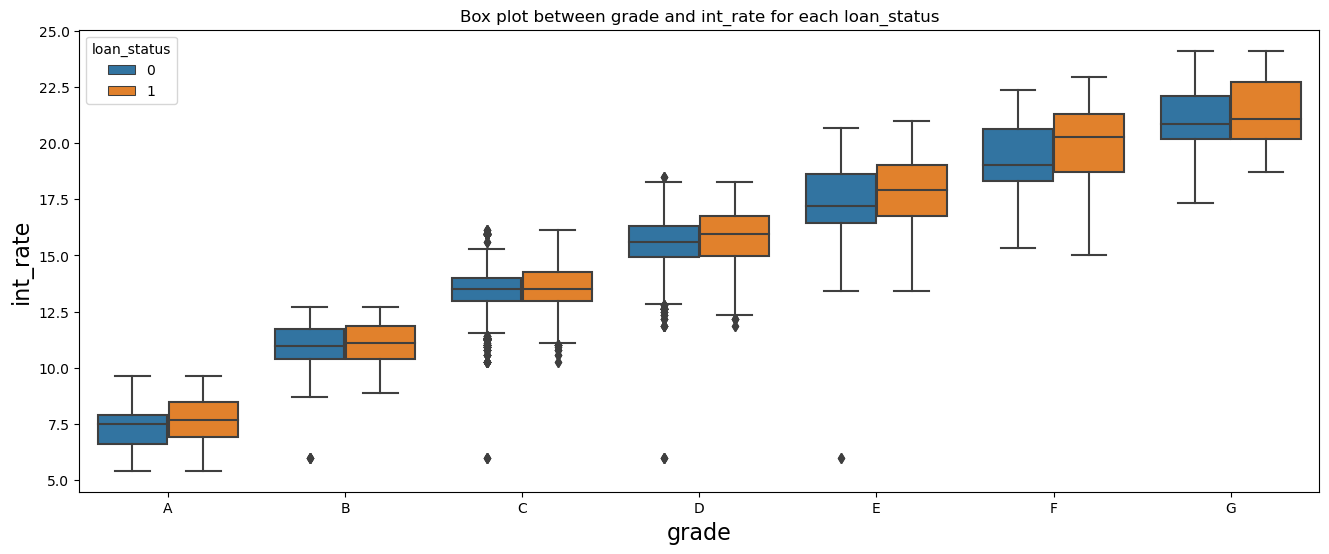

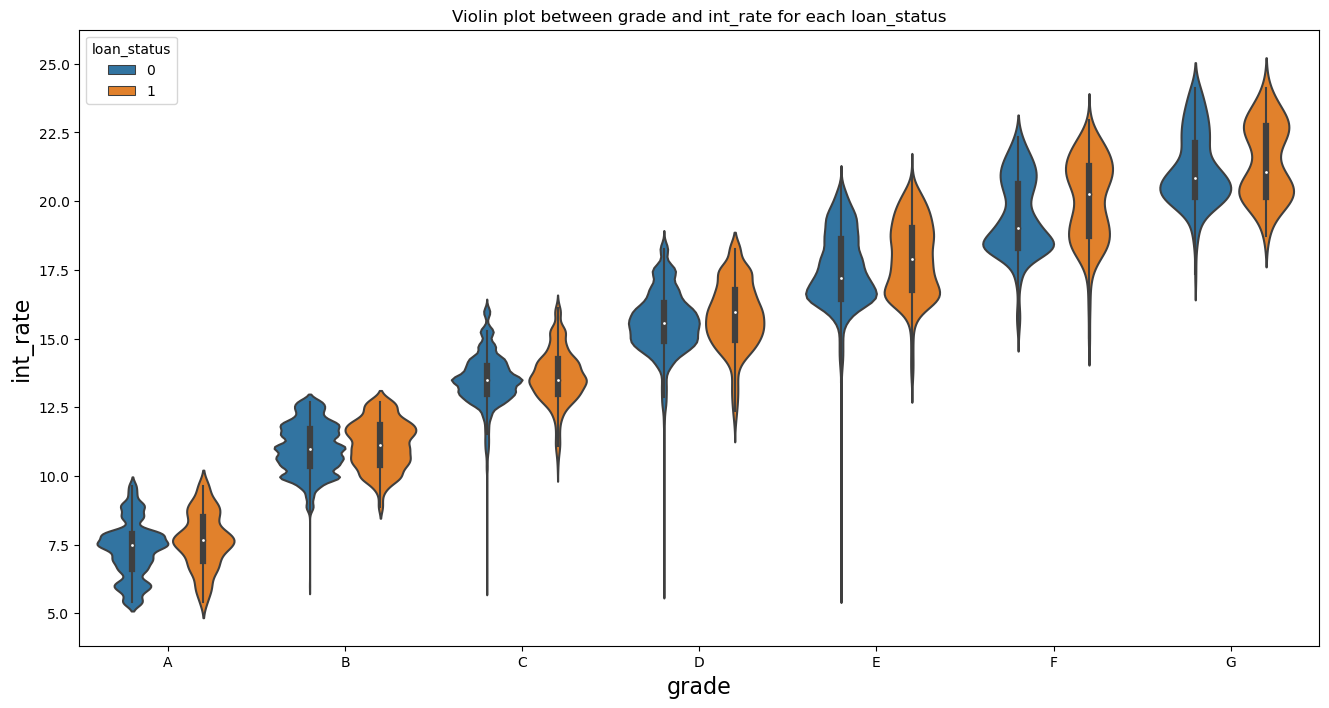

In [209]:
# plot box for grade vs int_rate for each loan_status
plotBox("grade", "int_rate", "loan_status")

**int_rate is increasing with every grade and also the defaulters for every grade are having their median near the non-defaulter 75% quantile of int_rate**

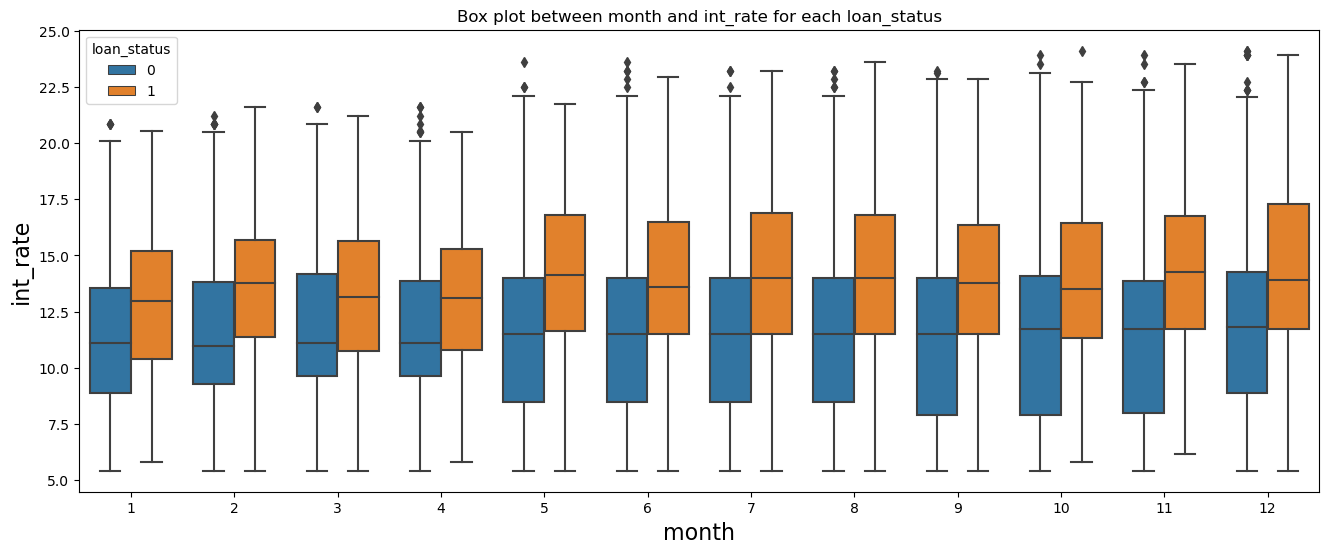

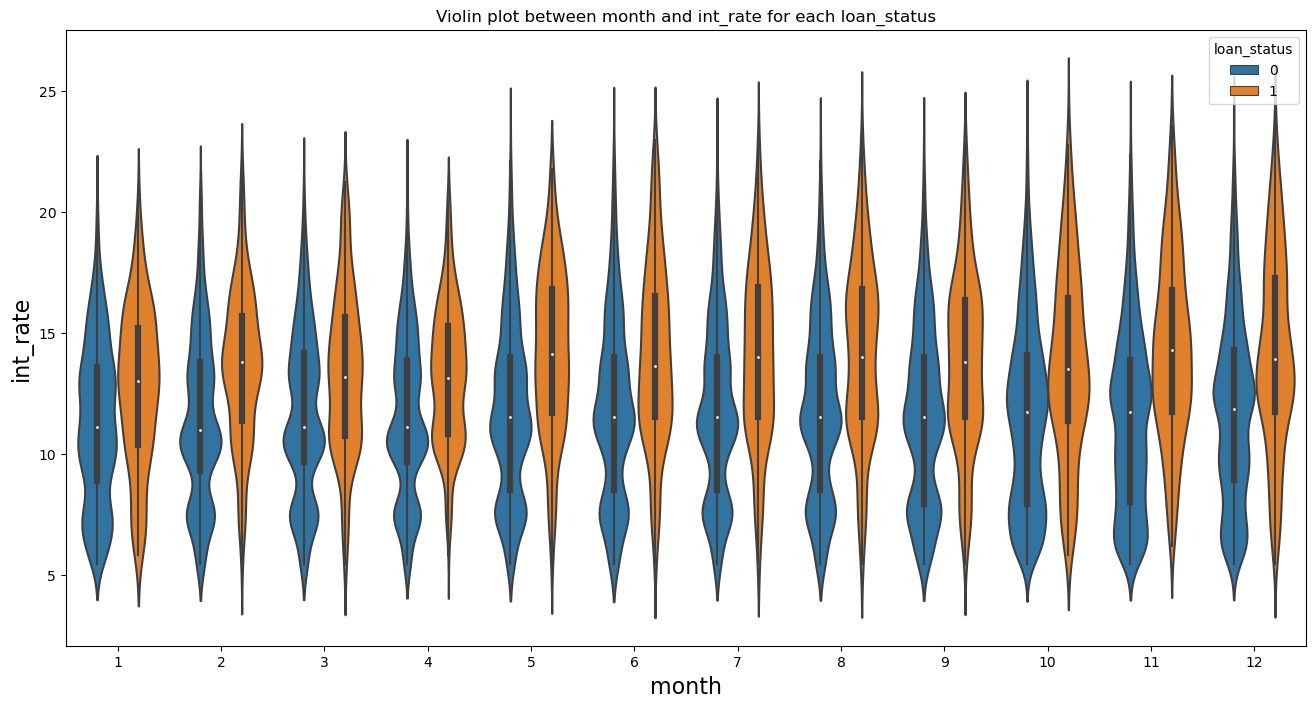

In [210]:
# plot box for issue_d vs int_rate for each loan_status
plotBox("month", "int_rate", "loan_status")

**int_rate for defaulter is increasing with every month where the defaulters for every month are having their median near the non-defaulter's 75% quantile of int_rate, but is almost constant for each month, not useful**

<font color = red, size=5>Hence, important feature from above Bivariate analysis are:

<font color = blue, size=5>term, grade, purpose, pub_rec, revol_util, funded_amnt_inv, int_rate, annual_inc, installment

## 3. Multivariate Analysis

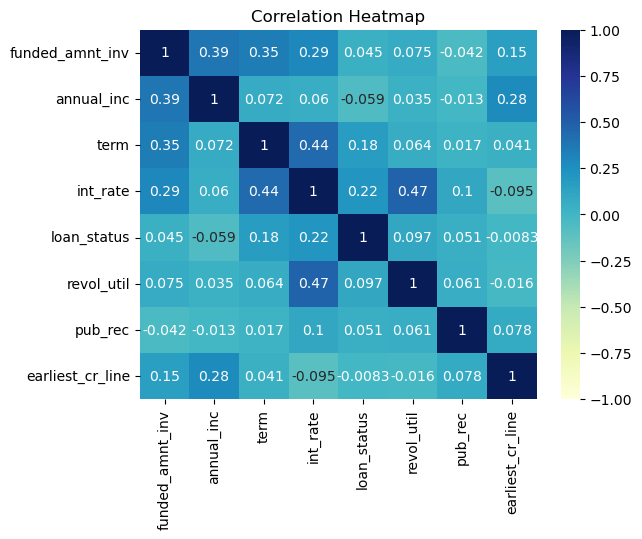

In [212]:
# plot heat map to see correlation between features
continuous_f = ["funded_amnt_inv", "annual_inc", "term", "int_rate", "loan_status", "revol_util", "pub_rec", "earliest_cr_line"]
loan_corr = Loan[continuous_f].corr()
sns.heatmap(loan_corr,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

<font color = RED, size=5>Hence, important related feature from above Multivariate analysis are:

<font color = BLUE, size=5>term, grade, purpose, revol_util, int_rate, installment, annual_inc, funded_amnt_inv



## FINAL FINDINGS

<font color = SKYBLUE, size=5>The best driving features for the Loan default are: term, grade, purpose, revol_util, int_rate, installment, annual_inc, funded_amnt_inv